<h1 style="text-align:center"> OK Cupid "Date-a-" Scientist </h1>
<h3 style="text-align:center"> A Codecademy Portfolio Project </h3>

This project is one of the portfolio projects that I completed as part of Codecademy's Data Science career path. Unlike previous Codecademy end-of-unit projects, this one came with no explicit directions other than "to practice formulating questions and implementing machine learning techniques to answer those questions." However, I rapidly realized that this "Portfolio" project is nothing more than an old Codecademy "Capstone" project; it's just that they took away the hints and guiding questions which were meant to help the learner develop some of their own questions to ask and provide a little guidance in choosing a method to answer those questions. I can see why they removed the hints; the old "Capstone" project prodded the learner to build both classification and regression machine learning models based on the data (not explicitly, but the hints were clearly designed to prod learners along this path), but the data better lends itself to natural language processing investigations. Or at least it does in my opinion. At any rate, I ultimately decided to do a mish-mosh of the two styles of approaching the data: I answered one question using natural language processing, and two other questions using classification machine learning models. I should note that, whether looking at the old "Capstone" project or the new "Portfolio" project, the data provided by Codecademy was exactly the same, so there is no issue merging the two investigative styles. 
<br>
<br>
Here are the specific questions addressed by this project:
<ol>
    <li> Can one predict whether an OK Cupid user's sex is male or female based on what they write in their profile essays? </li>
    <li> Can one predict whether an OK Cupid user's sex is male or female based on their self-reported age, drinking habits, drug-use habits, smoking habits, profile essays' lengths, the average lengths of words in their profile essays, and height in inches?  </li>
    <li> Can one predict an OK Cupid user's education level based on their self-reported age, sex, drinking habits, drug-use habits, smoking habits, profile essays' lengths, and the average lengths of words in their profile essays? </li>
</ol>
To the best of my ability to understand, "sex" in this data set indicates biological sex rather than gender identity. All users in the data set indicated their "sex" as either male (m) or female (f); if there was an option to list one's sex as non-binary, transsexual, or asexual, none of the users in the data set chose it. There was a separate option to list one's orientation; the three choices found in the data set were "straight," "bisexual," or "gay," and if there were any other options none of the users in the data set chose them. It is not clear to me if the data set was carefully curated to make this so, or if it just so happened that, of the 59,946 users randomly chosen for inclusion in the data set, none of them identified with any other orientation than those previously listed. I have reason to believe that some careful curation of the data was carried out; all of the users in the provided data set appear to live in the San Francisco, CA area, which I would not expect to be the case if users were truly chosen at random from the entire pool of OK Cupid users.
<br>
<br>
At appropriate places in this notebook, I will motivate my rationale behind the specific questions that I chose, and offer explanations as to why I did not pursue other questions. I am including my code here so that visitors to my GitHub can clearly see what I did and how I approached the project. I will also include the data set provided to me by Codecademy in the repository.
<br>

Codecademy did not include a reference for the data they obtained, so I do not know where it comes from or what sort of process was used to ensure that only users living near San Francisco, CA were included in the data set. I am quite happy to include this reference information if it is brought to my attention. Further, there is little explanation of some columns that I personally would like to have seen: for example, what precise units are heights measured in? What were all the options for sex and orientation, if more than the ones which appeared in the data set? For the body type, education, diet, offspring, ethnicity, job, pets, and religion columns, could users enter their answers as text or were there drop-down menus to choose from? Codecademy learners who had access to the old "Capstone" project were at least provided the following information about the topics of the essays included in the data set:<br>
essay0 - My self summary<br>
essay1 - What I’m doing with my life<br>
essay2 - I’m really good at<br>
essay3 - The first thing people usually notice about me<br>
essay4 - Favorite books, movies, show, music, and food<br>
essay5 - The six things I could never do without<br>
essay6 - I spend a lot of time thinking about<br>
essay7 - On a typical Friday night I am<br>
essay8 - The most private thing I am willing to admit<br>
essay9 - You should message me if…<br>
To the best of my ability to tell, newer users don't even have access to this information unless they download the example solution code. This is my main criticism of the current Codecademy iteration of the OK Cupid machine-learning project.


<h3> 1. Importing Analysis and Machine Learning Packages </h3>

First I import data analysis and plotting packages, as well as a package to evaluate regular expressions (regex) and several hypothesis-testing methods from the SciPy stats package:

In [1]:
# Import analysis packages:
import pandas as pd
import numpy as np

# Import plotting packages:
from matplotlib import pyplot as plt
import seaborn as sns 

# Import regular expressions package:
import re

# Import hypothesis-testing methods:
from scipy.stats import ks_2samp, ttest_ind, chi2_contingency

Next, I import data pre-processing tools from scikit-learn, as well as several supervised machine learning (ML) classes. I also import two ML Natural Language Processing (NLP) classes, and a few performance-measuring methods.

In [2]:
# Import data pre-processing packages:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import supervised ML classification classes:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Import supervised ML NLP classes:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Import performance-measuring methods:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

<h3> 2. Defining regex-Evaluation Functions </h3>

Taking a look through a few of the essays included in the data set, it's quite clear that if you give the general public a text box and let them type in pretty much whatever they want, they will in fact type in whatever they want, in whatever format they want. While most of the essays could probably be broken into "words" based on standard NLP tools, a few of them could have presented some challenges to such tools, and besides it's not the worst thing in the world to do some regex processing by hand at least once in one's career. The below functions were written to clean the essay data to make it easier to pass to NLP tools, and to format it for passing to later code aimed at determining essay length and average word length.

In [3]:
# I did not consider HTML links to be "words" in an essay, so I removed them from essays which contained them:
def remove_HTML(text):
    return re.sub('<.*?>', ' ', text)

# The below function is aimed at catching any HTML links the above one missed:
def remove_links(text):
    return re.sub(r"http\S+", " ", text)

# The below function removes several common punctuation marks from essays--I remove them because these characters do 
# not count as words in my mind.
def remove_punctuation(text):
    return re.sub(r',|\.|\:|;|-|/|&|!|\?|\(|\)|\+|@',' ',text)

# In essays 6 and 7, many users entered their response in list format and used standard puncation marks to separate
# words/phrases, so I opted to leave those puncuation marks in those essays and remove the others.
def remove_punct(text):
    return re.sub(r',|\.|\:|;|-|&|!|\?|\(|\)|\+|@',' ',text)

# Implementing some of the above functions may introduce multiple whitespaces ('  ' or '   ', etc.)
# Replace any instances of multiple whitespaces with a single whitespace:
def remove_xtra_whitespace(text):
    return re.sub(r'\s+', ' ', text)

# The below function splits text into "words" on space or on *:
def complex_split(text):
    return re.split(r'\s|\*', text)

# The below function splits text into "words" on space, *, or /:
def complexer_split(text):
    return re.split(r'\s|\*|/', text)

It should be noted that, even with the above cleaning, some "problem children" remained: namely, a few users insisted on not using any punctuation at all and merely typed their essay as a stream of characters without punctuation or spaces. While readable to a human, it's very difficult to see how a machine could reasonably break such essays into their component words, so I was forced to leave them as-is. I hope to continue improving my NLP skills to figure out how to deal with such text inputs--surely there must be an NLP tool designed specifically for such cases.

<h3> 3. Importing the Data and Characterizing the Columns </h3>

It is now time to import the OK Cupid user profile data as provided by Codecademy:

In [4]:
# Read in the .csv file and place into a Pandas DataFrame:
profiles = pd.read_csv('profiles.csv')
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

I now investigate some of the columns which I suspect contain categorical data. How many categories are present, and what are those categories?

In [5]:
# print out the categories associated with the "sex" column:
print('Sex:')
print(profiles.sex.unique())
print('')

# print out the categories associated with the "orientation" column:
print('Orientation:')
print(profiles.orientation.unique())
print('')

# print out the categories associated with the "status" column:
print('Status:')
print(profiles.status.unique())
print('')

# print out the categories associated with the "drinks" column:
print('Drinks:')
print(profiles.drinks.unique())
print('')

# print out the categories associated with the "drugs" column:
print('Drugs:')
print(profiles.drugs.unique())
print('')

# print out the categories associated with the "smokes" column:
print('Smokes:')
print(profiles.smokes.unique())
print('')

# print out the categories associated with the "body type" column:
print('Body Type:')
print(profiles.body_type.unique())
print('')

# print out the categories associated with the "ethnicity" column:
#print('Ethnicity:')
#print(profiles.ethnicity.unique())
#print(profiles.ethnicity.nunique())
#print('')
# 218 unique responses to "ethnicity;"" this is impractical to work with, let alone print to output.

# print out the categories associated with the "diet" column:
print('Diet:')
print(profiles.diet.unique())
print('')

# print out the categories associated with the "education" column:
print('Education:')
print(profiles.education.unique())
print('')

# print out the categories associated with the "pets" column:
print('Pets:')
print(profiles.pets.unique())
print('')

# print out the categories associated with the "religion" column:
print('Religion:')
print(profiles.religion.unique())

Sex:
['m' 'f']

Orientation:
['straight' 'bisexual' 'gay']

Status:
['single' 'available' 'seeing someone' 'married' 'unknown']

Drinks:
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']

Drugs:
['never' 'sometimes' nan 'often']

Smokes:
['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']

Body Type:
['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']

Diet:
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']

Education:
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduat

It is clear from the output above that the "pets" and "diet" columns have a fairly large number of categories; I thus decided that they would be impractical to work with. The case was even more extreme for the "religion" column, so I decided not to work with that one either. <br>
That having been said, even though the "education" column has around twice as many categories as "pets" and "diet," I decided that, given the information at hand, I could predict a user's "education" category using a supervised ML model, so I planned on working with the "education" column anyway. (In retrospect, this probably wasn't the best choice -- what's with all the "space camp" responses? -- but after having invested time in processing essays in such a way as to answer that question, I figured I'd follow through all the way.)<br>
While "body type" only had 12 categories, I decided not to work with this column as I couldn't think of any questions about "body type" that I wanted to answer with ML techniques.<br>
The "drinks," "drugs," and "smokes" columns clearly contain ordinal categorical data which could be readily converted to a numerical scale and used in ML predictive models. (Indeed, I fully acknowledge using Codecademy's hints from the "Capstone" version of this project to do just that.) Thus, I decided not to ask any questions about these columns. <br>
This left me with "sex," "orientation," and "status," and the "sex" column appealed to me because it is binary categorical and there's a host of ML techniques that I am familiar with which are well-suited to predicting binary categorical data. Also, further investigation of the "orientation" column (carried out in an earlier iteration of the project, which I intend to post to this GitHub repository) revealed that over 80% of users identified as "straight," which I figured could pose a challenge to any ML method I built to predict orientation. (If you just guess that everyone is straight, you'll be right over 80% of the time regardless of what fancy things your model does.) Besides, I could think of plenty of ways to predict sex based on the data in this data set, so I chose to focus on that. <br>
<br>
The output from the call to .info() revealed that I have two quantitative variables to work with: age and height. (An earlier iteration of the project revealed that hardly any users chose to provide income data, and that it was a sparse discrete quantitative variable on top of that, so I decided that "income" was impractical to work with.) "Drinks," "drugs," and "smokes" could be readily converted into numerical data, and I could tease out information about essay length and average length of words in an essay given a bit of text processing. This seemed a reasonable amount of numerical information to feed to a ML algorithm, and in light of this I formulated my two main questions: <br>

  1. Can I predict sex based on age, height, drinks, drugs, smokes, and essay data?  <br>
  2. Can I predict education based on age, sex, drinks, drugs, smokes, and essay data? <br>

Sex is included as an input feature for the second question because one can easily convert binary categorical data to numerical data by choosing one category to be "1" and one category to be "0." <br>
But beyond just getting quantitative information from the essays, their contents contain valuable information that could be used to predict at least one user trait. Since "sex" had the least number of categories, I decided to use the essays' contents to predict an OK Cupid user's sex; Codecademy spent a fair amount of time introducing and having the learner work with Naïve Bayes NLP models, so given this familiarity with such models I figured I could build one to predict "sex" with the essay data at hand. So, my final question was, <br>
  3. Can I predict sex based on the content of the provided essays?

Having formulated some questions, I continue my analysis of the data.

<h3> 4. Exploratory Data Analysis </h3>

When beginning any data science project, it is important to explore the data one is provided with to determine typical values, variability, proportions of the data which fall into various categories, and whether or not any features seem to be associated. <br>
For this project, I opted to take a bit of a short-cut and focus just on the DataFrame columns I knew I'd be working with; thus, I didn't create any bar charts or pie charts to investigate the "income," "diet," "pets," "body type," "religion," or "status" columns. That having been said, there are still plenty of columns to investigate: sex, age, drinks, drugs, smokes, education, and height. Later, I will also investigate essay length and essay average word length distributions. And even though I won't be using the "orientation" column to make any predictions, I was still curious to know if males or females (if either) were more likely to identify as "gay," so I will make a bar chart of this information as well ... and conduct an appropriate hypothesis test based on the results. <br>
I now turn my attention to the sex, age, drinks, drugs, smokes, education, and height columns to plot bar charts or histograms as appropriate. Also, knowing that I intend to predict sex based on most of the aforementioned columns, I will investigate whether or not age, drinks, drugs, smokes, and height are associated with sex. While it would be possible to do something similar for education and age, sex, drinks, drugs, and smokes, the sheer number of education categories makes plotting side-by-side bar charts and histograms impractical. 

In [6]:
# For ease in later plotting, separate males and females into their own DataFrames:
male_data = profiles[profiles.sex == 'm']
female_data = profiles[profiles.sex == 'f']

<h5> A. Proportion of Users of Each Sex </h5>

If I intend to predict a user's sex based on the profile information they provide, it would probably be good to know how many users of each sex there are in the data set. I already know from above that there are only two sexes in the data: male (m) and female (f). 

First, I look at raw counts of male and female profiles:

In [7]:
print(profiles.sex.value_counts())

m    35829
f    24117
Name: sex, dtype: int64


To make this easier to visualize, I plot a bar chart of the number of male users and the number of female users.

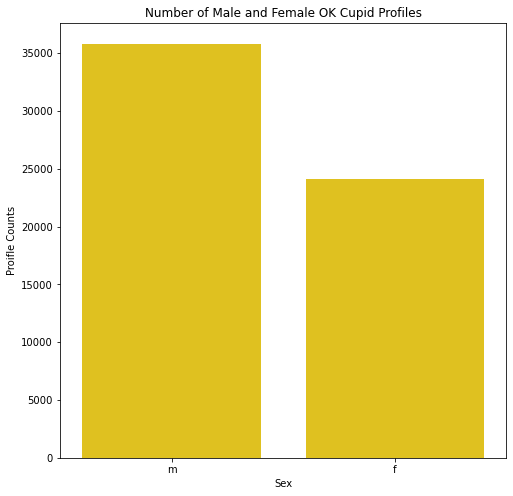

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(data = profiles, x = 'sex', color = 'gold')
plt.xlabel('Sex')
plt.ylabel('Proifle Counts')
plt.title('Number of Male and Female OK Cupid Profiles')
plt.savefig('sex_bar_graph.png')
plt.show()
plt.close('all')

Clearly, there are more males than females. But perhaps it might be easier to think about the sex data in terms of what percentage of users are male, and what percentage are female. I now investigate the fraction of male/female profiles: 

In [9]:
print(profiles.sex.value_counts()/59946.0)

m    0.597688
f    0.402312
Name: sex, dtype: float64


A pie chart is well suited to illustrate this table of numbers, so I make a pie chart below. 

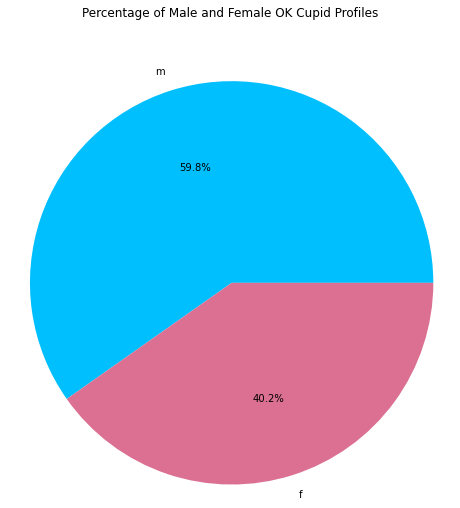

In [10]:
plt.figure(figsize=(8,8))
plt.pie(profiles.sex.value_counts(), labels = ['m','f'], autopct = '%0.1f%%', colors=['deepskyblue','palevioletred'])
plt.axis('equal')
plt.title('Percentage of Male and Female OK Cupid Profiles', y = 1.1)
plt.savefig('sex_pie_chart.png')
plt.show()
plt.close('all')

Since all users reported a sex, the above pie chart doesn't run into any issues regarding how null values (NaNs) are treated.

So, about 60% of the users in this data set are male, and about 40% are female. This will be important to bear in mind not only as I attempt to plot side-by-side bar charts and histograms of sex, height, drinks, drugs, and smokes data split by sex (there are men than women, so it will be useful to normalize bar charts and histograms to keep them on the same scale), but also as I attempt to build ML models which predict sex. After all, if I blindly guess that a user is male, I'll be right 60% of the time, not 50%. 60/40 will be the values to compare my model accuracy to, not 50/50.

<h5> B. Age Distribution </h5>

First, I plot a histogram of the age distribution of all OK Cupid users. I will use the Seaborn plotting package to do this, and I will ask it to plot a Kernel Density Estimate (KDE) of the distribution. (A KDE is sort of like a smoothed version of the histogram.) The KDE will be converted from density to counts for plotting.

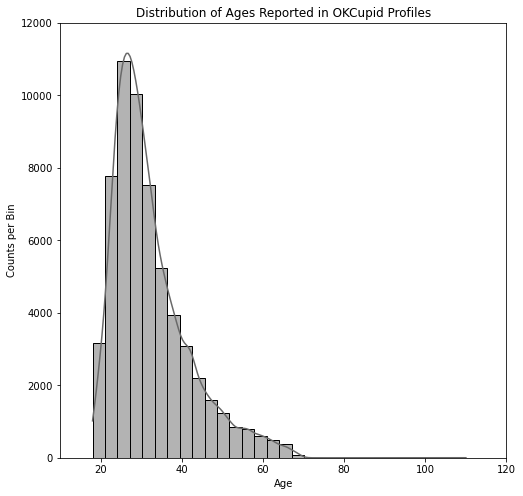

In [11]:
plt.figure(figsize=(8,8))
sns.histplot(data=profiles, x="age", bins = 30, stat = 'count', kde = True, color = 'dimgray')
plt.axis([10,120,0,12000])
plt.xlabel('Age')
plt.ylabel('Counts per Bin')
plt.title('Distribution of Ages Reported in OKCupid Profiles')
plt.savefig('age_distribution.png')
plt.show()
plt.close('all')

The above distribution extends out to a maximum age of 110, which I find dubious at best. (Oddly enough, on a free dating app there appear to be some users who don't take the profiles they create seriously.) However, the vast majority of users are between the ages of 18 and 80.

I now separate the age data based on the sex of the user and plot the resulting histograms. Actually, before I plot the histograms, let me see what the mean and median ages are for both distributions:

In [12]:
print('Average Male age: ' + str(np.round(np.mean(male_data.age),0)))
print('Median Male age: ' + str(np.median(male_data.age)))
print('Average Female age: ' + str(np.round(np.mean(female_data.age),0)))
print('Median Female age: ' + str(np.median(female_data.age)))

Average Male age: 32.0
Median Male age: 30.0
Average Female age: 33.0
Median Female age: 30.0


While the median ages of the two distributions are identical (and lower than the average, as would be expected for right-skew distributions such as these), the average female age is 1 year larger than the average male age.

Now I will plot the histograms split by sex. Note that I am plotting density (which takes the histogram of counts and normalizes it so that the total area of the bins is 1) rather than raw counts, because there are more men than women in the data set (see section A above) and doing so will put the data on the same scale. I will plot the KDE estimates for both distributions in addition to the histograms themselves.

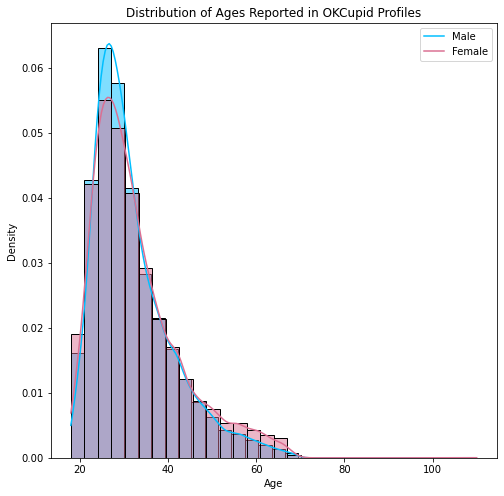

In [13]:
plt.figure(figsize=(8,8))
sns.histplot(data=male_data, x="age", bins = 30, stat = 'density', \
             kde = True, color = 'deepskyblue', alpha = 0.50)
sns.histplot(data=female_data, x="age", bins = 30, stat = 'density', \
             kde = True, color = 'palevioletred', alpha = 0.50)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Ages Reported in OKCupid Profiles')
plt.legend(['Male', 'Female'])
plt.savefig('sex_split_age_distribution.png')
plt.show()
plt.close('all')

There seems to be a slight difference between the two age distributions: the male age distribution's peak at ~30 is sharper than the female age distribution's peak, and there is a shallower drop-off at large ages for the female age distribution (seen as a "bump" in the KDE near 60). But do these visual differences indicate a statistically significant difference between the two age distributions? <br>
To test whether or not this is the case, I run a Kolmogorov-Smirnov (K-S) test to see if the data are consistent with having been drawn from the same underlying distribution, or in other words that the male ages and female ages I have in my data sample were drawn from the same age distribution. (See https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test for a full discussion of the one- and two-sample K-S test.) The null hypothesis is that both male and female ages were drawn from the same age distribution, and any difference between them that I might see is due to chance. The alternate hypothesis is that male and female ages were not drawn from the same distribution. In order to conduct this test, I need to choose a significance threshold for rejecting the null hypothesis. A p-value of 0.05 is usually chosen, but I tend to be a bit more conservative in my threshold choosing so I will choose a threshold of 0.01. 

In [14]:
ksstat_mf, kspval_mf = ks_2samp(male_data.age,female_data.age)
print('K-S test p-value for Male and Female ages test: '+ str(kspval_mf))

K-S test p-value for Male and Female ages test: 8.516721693170753e-16


The resulting p-value is obviously much less than 0.01, so I reject the null hypothesis in favor of the alternative hypothesis. Thus, I conclude that the male and female age distributions in this data set are consistent with having been drawn from different underlying age distributions. Age and sex seem to be associated.

(If the reader is familiar with the Codecademy curriculum, they might be asking, "Why did you run a K-S test and not a 2-sample t-test?" After all, a 2-sample t-test has as its null hypothesis that the means of two distributions are equal, and that the difference between the two means observed is just due to random chance. I didn't use a 2-sample t-test because a 2-sample t-test assumes the data are normally distributed, and neither of the above distributions looks like a Gaussian curve to me. Also, 2-sample t-test also assumes that the data result from a random sampling of a population(s)--which to be fair, all hypothesis tests assume--and I remain dubious that this is in fact the case for this data set.)

<h5> C. Self-Reported Drinking Habits Proportions </h5>

As mentioned above, the "drinks" column of the OK Cupid data set consists of an ordinal categorical feature. There is a clear, natural order to the self-reported drinking habits of users, with "not at all" being the least and "desperately" being the most. Not only does that make it easy to convert category to number -- "not at all" maps to 0, "rarely" maps to 1, etc. -- but it also provides a natural way to order the bars in a bar chart of drinking habits. I construct such a bar chart below.

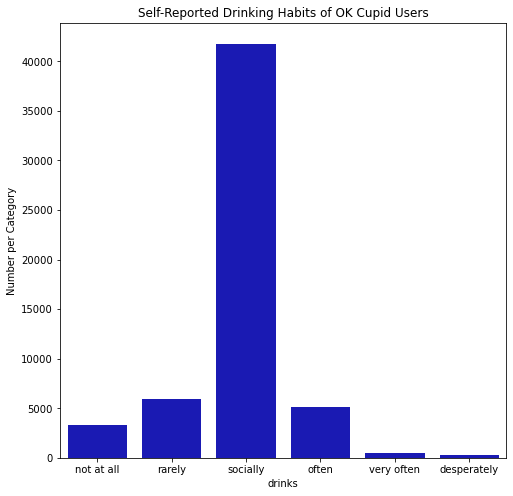

In [15]:
drinks_data = profiles.drinks
drinks_data.dropna(inplace = True)
plt.figure(figsize=(8,8))
sns.countplot(data=profiles, x='drinks', order=['not at all','rarely','socially', 'often', 'very often', \
                                                'desperately'], color='mediumblue')
plt.ylabel("Number per Category")
plt.title("Self-Reported Drinking Habits of OK Cupid Users")
plt.savefig('drinking_bar_graph.png')
plt.show()
plt.close('all')

Here are the raw numbers that went into making that bar chart:

In [16]:
print(profiles.drinks.value_counts())

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64


Clearly, the vast majority of OK Cupid users who answered this profile question identify as social drinkers. How does this break down by sex, though? I will now plot that bar chart. But note that, since there are more males than females in the data set, I will be plotting on the vertical axis the fraction of males and females who identify with each drinking category rather than raw counts.

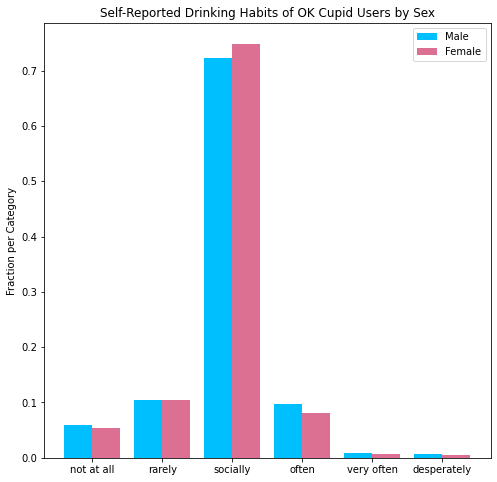

In [17]:
# dropping the rows where users didn't enter a drinking habit and saving the results to new DataFrames:
m_drinks_data = male_data.dropna(subset=['drinks'])
f_drinks_data = female_data.dropna(subset=['drinks'])

# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first sub-sample 
t = 2 # Number of sub-samples 
d = 6 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second subsample 
t = 2 # Number of sub-samples 
d = 6 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

# find the bar edge common to both male and female bars and arrange to put the horizontal axis labels there:
centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

# gather lists of "drinks" value counts/length of array in the proper order:
m_hist_y = [2034/len(m_drinks_data),3549/len(m_drinks_data),24557/len(m_drinks_data),3314/len(m_drinks_data),\
            294/len(m_drinks_data), 208/len(m_drinks_data)]

f_hist_y = [1233/len(f_drinks_data),2408/len(f_drinks_data),17223/len(f_drinks_data),1850/len(f_drinks_data),\
            177/len(f_drinks_data), 114/len(f_drinks_data)]

# finally plot the bar chart:
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1, m_hist_y, color = 'deepskyblue')
plt.bar(xvalues2,f_hist_y, color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(['not at all','rarely','socially', 'often', 'very often','desperately'])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drinking Habits of OK Cupid Users by Sex")
plt.legend(['Male', 'Female'])
plt.savefig('sex_split_drinking_bar_graph.png')
plt.show()
plt.close('all')

From the bar chart above, it looks as though a higher fraction of female OK Cupid users are social drinkers when compared to male OK Cupid users. But, the fraction of males who drink "not at all," "very often," and "desperately" is higher than that of females. Does this mean that there is an association between drinking and sex? <br>
There's only one way to find out: run a hypothesis test. Since I have two categorical features, the appropriate hypothesis test is a chi-squared test. This test is used to determine if there is a significant association between two categorical variables. (Source: https://stattrek.com/chi-square-test/independence.aspx) The null hypothesis in the case at hand is that there is no association between drinking habits and sex. This means that the alternate hypothesis is that there is an association between drinking habits and sex. In order to perform a chi-squared test with SciPy, I need a contingency table, which is nothing more than a matrix of counts of drinking habits broken up by sex. The columns of the contingency table will be sex, and the rows will be drinking habits. I'll use the Pandas method .crosstab() to make the contingency table that will be passed on to the chi-square test method chi2_contintency(). <br>
Also, I'll need to choose a pre-determined significance level to decide whether or not to reject the null hypothesis. I will once again choose a threshold of 0.01.

In [18]:
profiles_nodrinksna = profiles.dropna(subset=['drinks'])

drinks_sex_xtab = pd.crosstab(profiles_nodrinksna.drinks, profiles_nodrinksna.sex)

chi2_2, pvalue_2, dof2, expect2 = chi2_contingency(drinks_sex_xtab)
print('Chi-square p-value for sex/drinking association: '+ str(pvalue_2))

Chi-square p-value for sex/drinking association: 5.942666463761216e-14


The p-value obtained from the chi-squared is much less than my pre-determined significance threshold, so I reject the null hypothesis. There does indeed seem to be an association between drinking habits and sex.

<h5> D. Self-Reported Drug Use Proportions </h5>

The "drugs" column of the OK Cupid data set also contains an ordinal categorical feature; there is a clear, logical gradation in reported drug use habits from none at all ("never") to frequent use ("often"). Indeed, one can imagine a mapping of the three categories in this column to integers as follows: "never" maps logically to 0, "sometimes" maps logically to 1, and "often" maps logically to 2. As was the case for the "drinks" column, the natural order of the categories provides a natural way to order the bars in a bar chart of self-reported drug use, and I create such a bar chart below.

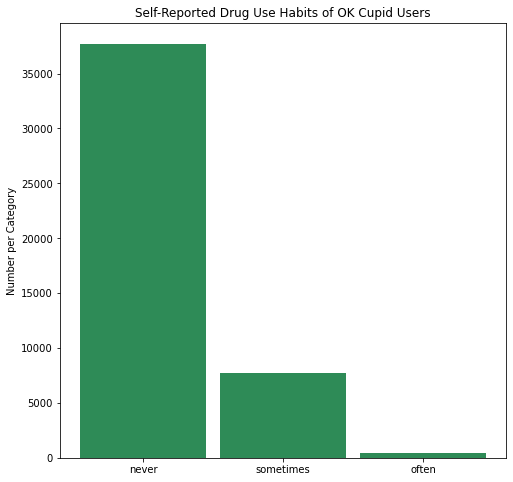

In [19]:
drugs_data = profiles.drugs
drugs_data.dropna(inplace = True)
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar([1,2,3],drugs_data.value_counts(), width = 0.9, color = 'seagreen')
ax.set_xticks([1,2,3])
ax.set_xticklabels(["never", "sometimes", "often"])
plt.ylabel("Number per Category")
plt.title("Self-Reported Drug Use Habits of OK Cupid Users")
plt.savefig('drugs_bar_graph.png')
plt.show()
plt.close('all')

Here are the raw numbers that went into making the above histogram:

In [20]:
print(profiles.drugs.value_counts())

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64


Roughly 82% of OK Cupid users who responded to the drug use prompt self-report that they never use drugs; about 17% self-report that they sometimes use drugs; and 1% self-report that they often use drugs. <br>
How does this break down by sex? I will now plot that bar chart, once again plotting on the vertical axis the fraction of males and females who identify with each drug-use category, in light of the fact that there are more males than females in the data set.

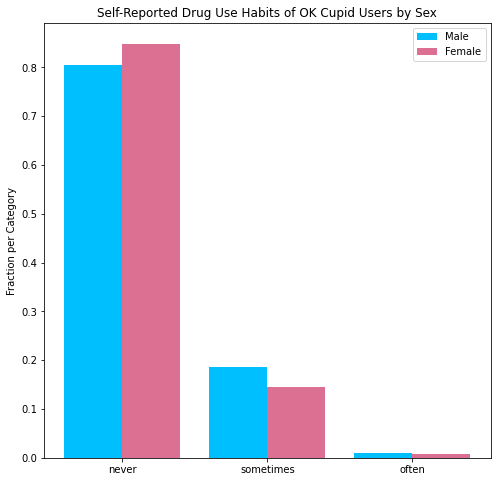

In [21]:
# dropping the rows where users didn't enter a drug use habit and saving the results to new DataFrames:
m_drugs_data = male_data.dropna(subset=['drugs'])
f_drugs_data = female_data.dropna(subset=['drugs'])

# plucking off just the "drugs" column from the above two DataFrames:
m_drugs = male_data.drugs
f_drugs = female_data.drugs

# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first sub-sample 
t = 2 # Number of sub-samples 
d = 3 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second subsample 
t = 2 # Number of sub-samples 
d = 3 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

# find the bar edge common to both male and female bars and arrange to put the horizontal axis labels there:
centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

# finally plot the bar chart:
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1,m_drugs.value_counts()/len(m_drugs_data), color = 'deepskyblue')
plt.bar(xvalues2,f_drugs.value_counts()/len(f_drugs_data), color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(["never", "sometimes", "often"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Drug Use Habits of OK Cupid Users by Sex")
plt.legend(['Male', 'Female'])
plt.savefig('sex_split_drugs_bar_graph.png')
plt.show()
plt.close('all')

It seems as though a higher fraction of females self-report that they do not use drugs, whereas a higher fraction of males self-report that they sometimes use drugs. Does this indicate that there is an association between drug use and sex? <br>
Once again, a chi-squared test can be used to test for an association between the categorical variables "drugs" and "sex." I will use the same procedure to test for such an association that I used to test for an association between "drinks" and "sex:" namely, build a cross-tabulation table with pd.crosstab() and pass that as the contingency table to chi2_contingency(). My significance threshold will once again be 0.01.

In [22]:
profiles_nodrugsna = profiles.dropna(subset=['drugs'])

drugs_sex_xtab = pd.crosstab(profiles_nodrugsna.drugs, profiles_nodrugsna.sex)

chi2_3, pvalue_3, dof3, expect3 = chi2_contingency(drugs_sex_xtab)
print('Chi-square p-value for sex/drug use association: '+ str(pvalue_3))

Chi-square p-value for sex/drug use association: 3.362862897797776e-33


Once again, the resulting p-value is much, much less than the <i>a priori</i> chosen threshold value, so I reject the null hypothesis that there is no association between self-reported drug use habits and sex.

<h5> E. Self-Reported Smoking Habits Proportions </h5>

Like the "drinks" and "drugs" columns of this data set, the "smokes" column consists of an ordinal categorical feature; there is a natural order in the responses ranging from least self-reported smoking ("no") to most self-reported smoking ("yes"). While I will leave the details of the category -> integer mapping for later in this notebook, suffice it to say that the natural order of the categories provides a natural bar order for an OK Cupid self-reported smoking habits bar chart. This bar chart can be found below.

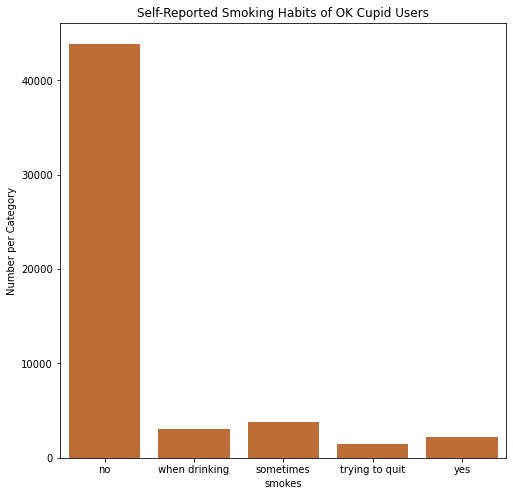

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(data=profiles, x='smokes', order=['no','when drinking','sometimes','trying to quit', 'yes'], \
              color='chocolate')
plt.ylabel("Number per Category")
plt.title("Self-Reported Smoking Habits of OK Cupid Users")
plt.savefig('smokes_bar_graph.png')
plt.show()
plt.close('all')

Of OK Cupid users who entered a response for their smoking habits, the vast majority are non-smokers. This is evident not only from the above histogram, but from the table of counts below.

In [24]:
print(profiles.smokes.value_counts())

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64


Interestingly, more users self-report that they do indeed smoke than self-report that they are trying to quit smoking. <br>
Since I plan on using this "smokes" data to predict sex, I will need to see whether there seems to be an association between self-reported smoking habits and sex. The first step in this is to plot a bar chart of the data, which I do below, once again plotting on the vertical axis the fraction of males and females who self-report themselves as belonging in each smoking category.

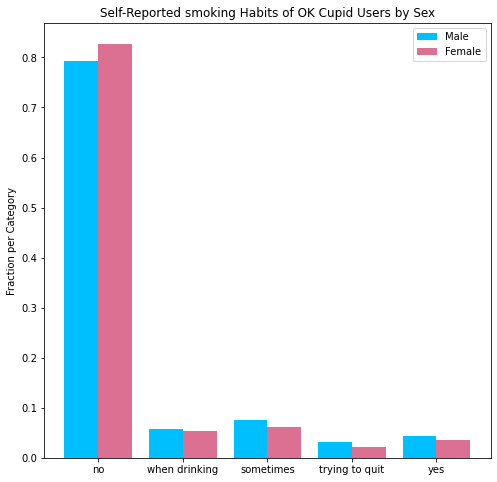

In [25]:
# dropping the rows where users didn't enter a drug use habit and saving the results to new DataFrames:
m_smokes_data = male_data.dropna(subset=['smokes'])
f_smokes_data = female_data.dropna(subset=['smokes'])

# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first sub-sample 
t = 2 # Number of sub-samples 
d = 5 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second subsample 
t = 2 # Number of sub-samples 
d = 5 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

# find the bar edge common to both male and female bars and arrange to put the horizontal axis labels there:
centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

# finally plot the bar chart:
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1,[25635/len(m_smokes_data),1878/len(m_smokes_data),2421/len(m_smokes_data),1000/len(m_smokes_data),\
                  1435/len(m_smokes_data)], color = 'deepskyblue')
plt.bar(xvalues2,[18261/len(f_smokes_data),1162/len(f_smokes_data),1366/len(f_smokes_data),480/len(f_smokes_data),\
                  796/len(f_smokes_data)], color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(["no", "when drinking", "sometimes", "trying to quit", "yes"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported smoking Habits of OK Cupid Users by Sex")
plt.legend(['Male', 'Female'])
plt.savefig('sex_split_smoking_bar_graph.png')
plt.show()
plt.close('all')

To test if there an association between "smokes" and "sex," a chi-squared test will be performed in the same fashion as it was for "drinks" and "sex" and "drugs" and "sex." I once again pre-select a significance threshold of 0.01 for rejecting the null hypothesis (which of course is that "smokes" and "sex" are not associated).

In [26]:
profiles_nosmokena = profiles.dropna(subset=['smokes'])

smoke_sex_xtab = pd.crosstab(profiles_nosmokena.smokes, profiles_nosmokena.sex)

chi2_4, pvalue_4, dof4, expect4 = chi2_contingency(smoke_sex_xtab)
print('Chi-square p-value for sex/smoking association: '+ str(pvalue_4))

Chi-square p-value for sex/smoking association: 3.495544214591011e-25


The resulting p-value is much, much less than the pre-chosen threshold, so I reject the null hypothesis in favor of the alternate hypothesis that self-reported smoking habits and sex are associated.

<h5> F. Height Distribution </h5>

One of the three discrete (or at least integer) quantitative variables in the data set is height, which I know to be associated with sex. (The other two discrete quantitative variable were age and income.) Females tend, on average, to be shorter than males. But, it is worth exploring how big a difference those average heights are for OK Cupid users in this data set. I also know another thing about heights, at least among the general human population: the height distribution follows a Gaussian curve. So, I expect both the "total" height distribution and the height distribution of each sex to be normally distributed. I will plot the "total" (i.e., male and female together) height distribution as a histogram to see if this is indeed the case. When I construct the histogram, I will ask Seaborn to calculate a KDE and plot that on the figure as well (once scaled to match counts and not density).

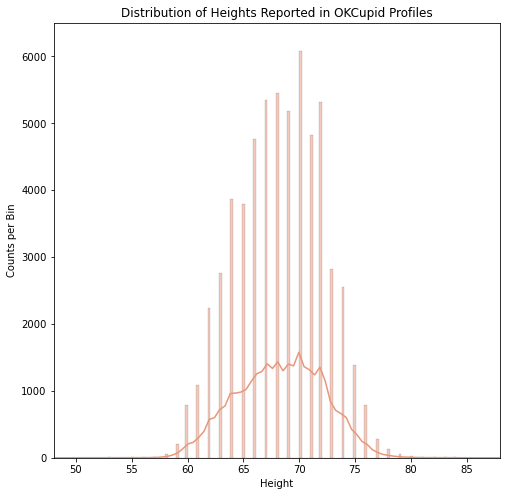

In [27]:
profiles_noheightna = profiles.dropna(subset=['height'])

plt.figure(figsize=(8,8))
sns.histplot(data=profiles_noheightna, x="height", stat = 'count',  kde = True, color = 'darksalmon')
plt.axis([48,88,0,6500])
plt.xlabel('Height')
plt.ylabel('Counts per Bin')
plt.title('Distribution of Heights Reported in OKCupid Profiles')
plt.savefig('height_distribution.png')
plt.show()
plt.close('all')

I am assuming that OK Cupid requested that users enter their height in inches, or that some algorithm somewhere in the OK Cupid system converted user-input heights to inches. The values seen above are clearly not heights in feet, and they cannot be heights in centimeters either--they are far too short for that. I do note that the shape of the histogram is roughly Gaussian, which matches what I know of height distributions. <br>
In the interests of full disclosure, I should note that the above histogram of heights does not include the extrema values of height which exist in the data set. I assume that the heights I was provided with are measured in inches when making this statement. Consider the maximum and minimum values in the data set for users who entered their heights:

In [28]:
print("Mimimum female height: " + str(min(profiles_noheightna.height[profiles_noheightna.sex == 'f'])))
print("Maximum female height: " + str(max(profiles_noheightna.height[profiles_noheightna.sex == 'f'])))
print("Mimimum male height: " + str(min(profiles_noheightna.height[profiles_noheightna.sex == 'm'])))
print("Maximum male height: " + str(max(profiles_noheightna.height[profiles_noheightna.sex == 'm'])))

Mimimum female height: 4.0
Maximum female height: 95.0
Mimimum male height: 1.0
Maximum male height: 95.0


It is possible that the female who entered their height as 4.0 entered their height in feet rather than inches, or that something went wrong in the feet-to-inches conversion process; however, I cannot come up with a rational explanation for why a male user would enter their height as either 1 foot or 1 inch. (I repeat my previous comment about some folks not taking a free online dating profile terribly seriously.) While heights of 95 inches are certainly within the realm of human growth capabilities, that's a height of 7 feet 9 inches, which I find incredibly unlikely for a female--that's far, far out in the tail of the height distribution of females. It's unlikely for males as well, but not quite as unlikely as it is for females. I am unwilling to excise these extrema data from the data set entirely, as my suspicion that they are "bad data" is not reason enough to do so, but I can point out their existence and how suspect they are. <br>
Incidentally, while I am reporting on this issue, there's how many heights below 10 inches were reported, and how many above 90 were reported:

In [29]:
print("Female heights greater than 90 inches: " + \
      str(len(profiles_noheightna[(profiles_noheightna.sex == 'f') & (profiles_noheightna.height > 90.0)])))
print("Male heights greater than 90 inches: " + \
      str(len(profiles_noheightna[(profiles_noheightna.sex == 'm') & (profiles_noheightna.height > 90.0)])))

print("Female heights less than 10 inches: " + \
      str(len(profiles_noheightna[(profiles_noheightna.sex == 'f') & (profiles_noheightna.height < 10.0)])))
print("Male heights less than 10 inches: " + \
      str(len(profiles_noheightna[(profiles_noheightna.sex == 'm') & (profiles_noheightna.height < 10.0)])))

Female heights greater than 90 inches: 9
Male heights greater than 90 inches: 19
Female heights less than 10 inches: 3
Male heights less than 10 inches: 3


Assume an average American female height of 5 feet 4 inches, or 64 inches tall. The distribution has a standard deviation of 2.5 inches. A height of 90 inches is $\frac{90-64}{2.5} = 10.4 \sigma$ above the mean. I'm not quite in a position to evaluate erf(x) for $x = \frac{10.4}{\sqrt(2)}$--and then divide that by 2--but I'm willing to bet that it's less than $\frac{2.56 \times 10^{-12}}{2}$, which is the probability of differing from the norm by more than $7 \sigma$. Translated, one 90-inch tall female being in a data set of 25,000 (rounding up a fair amount) ain't likely, let alone 9. Those data points are suspect.

Now assume an average American male height of 5 feet 9 inches, or 69 inches tall. The distribution has a standard deviation of 3 inches. A height of 90 inches is $\frac{90-69}{3} = 7 \sigma$ above the mean. Thanks to https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule, I know that the probability of being $7 \sigma$ above the mean or higher is $\frac{2.56 \times 10^{-12}}{2}$, which translates to a probability of $1.28 \times 10^{-12}$. In a data set of 33,000 males (rounding up a bit), I'd not expect to see anyone with a height above 90 inches. There are 19. Again, those data points are suspect.

With that in mind, I now plot the distribution of male heights and the distribution of female heights. I will plot density rather than counts, as there are more males than females in the data set. And, I will once again ask Seaborn to calculate the KDE for each distribution and plot them alongside the normalized histograms. 

59943 35827 24116


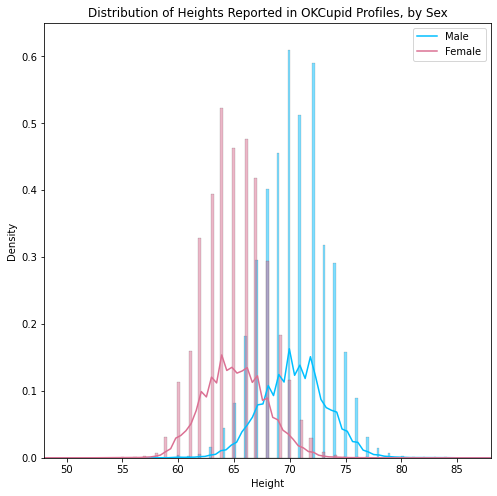

In [30]:
male_data_noheightna = male_data.dropna(subset=['height'])
female_data_noheightna = female_data.dropna(subset=['height'])

print(len(profiles_noheightna), len(male_data_noheightna), len(female_data_noheightna))

plt.figure(figsize=(8,8))
sns.histplot(data=male_data_noheightna, x="height", stat = 'density', \
             kde = True, color = 'deepskyblue', alpha = 0.50)
sns.histplot(data=female_data_noheightna, x="height", stat = 'density', \
             kde = True, color = 'palevioletred', alpha = 0.50)
plt.axis([48,88,0,0.65])
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Distribution of Heights Reported in OKCupid Profiles, by Sex')
plt.legend(['Male', 'Female'])
plt.savefig('sex_split_height_distribution.png')
plt.show()
plt.close('all')

Both height distributions seem to follow a Gaussian curve. The female height distribution appears to peak at around 64 or 65 inches, whereas the male height distribution appears to peak at around 71 or 72 inches. Let me get the actual averages before proceeding further:

In [31]:
print('Average female height: ' + str(np.round(np.mean(female_data_noheightna.height),1)) + ' inches.')
print('Average male height: ' + str(np.round(np.mean(male_data_noheightna.height),1)) + ' inches.')

Average female height: 65.1 inches.
Average male height: 70.4 inches.


The average female height in this data set is 1 inch taller than the national average, which is within 1 standard deviation and therefore entirely consistent with the national average. The average male height in this data set is 1 inch taller than the national average, which again is within 1 standard deviation and therefore entirely consistent with the national average. <br>
For the sake of completeness, I run a 2-sample t-test on the two height distributions, with the null hypothesis that both average heights are the same, and that the difference I observed is due to chance. (I CAN run a 2-sample t-test here because the data are clearly normally distributed, although I am still a bit suspicious about them being randomly sampled.) I have to choose a significance threshold, which I know the results will be nowhere near, but for the sake of completeness let's choose it to be 0.01.

In [32]:
ttestval_mf_height, pval_mf_height = ttest_ind(male_data_noheightna.height,female_data_noheightna.height)
print('2-sample t-test p-value for Male and Female heights test: '+ str(pval_mf_height))

2-sample t-test p-value for Male and Female heights test: 0.0


I highly doubt the true p-value resulting from the test is actually 0, it's just that the value is so small that my machine cannot display it properly. At any rate, yeah, the null hypothesis can be soundly rejected. Height and sex, as I already knew, are associated.

<h5> G. Proportion of Users by Orientation </h5>

As I mentioned above, I will not be including "orientation" in my later analysis. However, this nominal categorical variable is comprised of only 3 categories, so I wanted to do <i>some</i> sort of analysis of it. Further, it was relatively easy for me to come up with a question to ask of this particular feature: namely, is there a significant difference in the number of people who identify as "straight," "bisexual," and "gay" between males and females? The first step in answering this question is to take a look at a bar chart of the "orientation" variable, which I do below. 

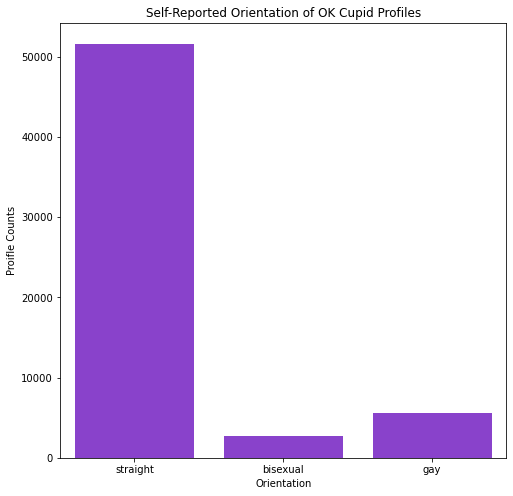

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(data = profiles, x = 'orientation', color = 'blueviolet')
plt.xlabel('Orientation')
plt.ylabel('Proifle Counts')
plt.title('Self-Reported Orientation of OK Cupid Profiles')
plt.savefig('orientation_bar_graph.png')
plt.show()
plt.close('all')

The raw numbers that go into making the above histogram are:

In [34]:
print(profiles.orientation.value_counts())

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64


Of the OK Cupid users in this data set, 86.1% identify as "straight," 9.3% identify as "gay," and 4.6% identify as "bisexual." The clear majority of users identify as "straight;" indeed, the overwhelming number of "straight" users is why I opted not to try and predict "orientation" using the data in this data set. Given so few "gay" and "straight" users compared to "straight" users, any machine learning model I might try and build would be trained mostly on "straight" users, so basically all the algorithm would do is guess that someone is straight and be wrong occasionally. That's not a very good way to go about building a robust, informative machine learning model, so I didn't. <br>
Now that I know how "orientation" breaks down for the full data set, it is time to see how "orientation" breaks down when split by "sex." Again, I plot the fraction of males and females who self-report themselves as being "straight," "gay," and "bisexual," because there are more males in the data set than females.

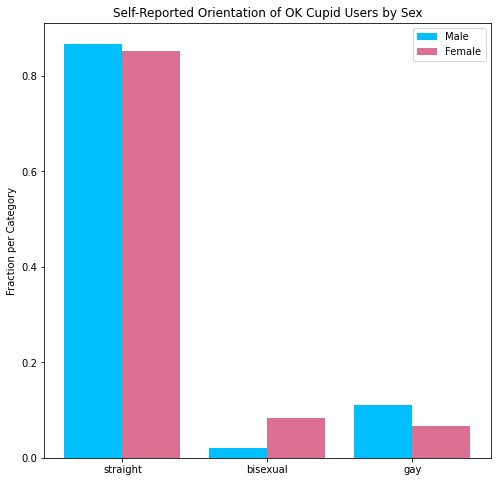

In [35]:
m_orientation = male_data.orientation
f_orientation = female_data.orientation

# The following code is borrowed for Codecademy for making four side-by-side bar plots:
# male data:
n = 1 # This is the first sub-sample 
t = 2 # Number of sub-samples 
d = 3 # Number of bars 
w = 0.8 # Width of each bar 
xvalues1 = [t*element + w*n for element in range(d)]
# female data:
n = 2 # This is the second subsample 
t = 2 # Number of sub-samples 
d = 3 # Number of bars 
w = 0.8 # Width of each bar 
xvalues2 = [t*element + w*n for element in range(d)]

# find the bar edge common to both male and female bars and arrange to put the horizontal axis labels there:
centers = [xvalues1[i]+((xvalues2[i]-xvalues1[i])/2.0) for i in range(len(xvalues1))]

# finally plot the bar chart:
plt.figure(figsize=(8,8))
ax = plt.subplot()
plt.bar(xvalues1,[31073/len(male_data), 771/len(male_data), 3985/len(male_data)], color = 'deepskyblue')
plt.bar(xvalues2,[20533/len(female_data), 1996/len(female_data), 1588/len(female_data)], color = 'palevioletred')
ax.set_xticks(centers)
ax.set_xticklabels(["straight", "bisexual", "gay"])
plt.ylabel("Fraction per Category")
plt.title("Self-Reported Orientation of OK Cupid Users by Sex")
plt.legend(['Male', 'Female'])
plt.savefig('sex_split_orientation_bar_graph.png')
plt.show()
plt.close('all')

A slightly higher percentage of male users identify as "straight" than female users. However, it is clear that a much higher fraction of female users identify as "bisexual," whereas a higher fraction of male users identify as "gay." Are these differences significant; that is to say, is there an association between orientation and sex? I run a chi-squared hypothesis test to find out, with the null hypothesis being that there is no difference between males and females when it comes to "orientation."

In [36]:
sex_orientation_xtab = pd.crosstab(profiles.orientation, profiles.sex)

chi2_1, pvalue_1, dof1, expect1 = chi2_contingency(sex_orientation_xtab)
print('Chi-square p-value for sex/orientation association: '+ str(pvalue_1))

Chi-square p-value for sex/orientation association: 0.0


Again, I highly doubt the true p-value resulting from this chi-squared test is actually 0; rather, the number is likely so small that my computer cannot store it properly. So there does indeed seem to be an association between sex and orientation. Females are more likely to identify as "bisexual," and males are more likely to identify as "gay."

<h3> 5. Pre-Processing Text Data </h3>

One of the questions I wish to answer in this project is, "Can I predict sex based on the content of the provided essays?" In order to achieve this, I will build a Multinomial Naïve Bayes ML classification model based on what users wrote in their essays. But in order to build such a model, I need to process the essay data a bit to remove things like HTML links, punctuation marks and HTML characters: this is because I am not interested in people's grammar and use of punctuation, what websites they think are interesting, or how the punctuation they did enter is coded for HTML; rather, I am interested in the words they are using to express themselves. Thus, I am considering HTML links, punctuation marks and HTML characters noise and will remove that noise before passing essay contents to the Multinomial Naïve Bayes ML classifier. In section 2, I wrote some regex evaluation functions which I now make use of here. The functions remove HTML links, punctuation marks and HTML characters commonly found in essays; I also replace any missing essays (i.e., null values) with an empty string ('') and convert all remaining text characters to lowercase. 

In [37]:
# replace NaN (i.e., null) values with an empty string. This must be done first, as the function calls
# which follow these rely on there being no NaN values in the data.
profiles.essay0 = profiles.essay0.replace(np.nan, '', regex=True)
profiles.essay1 = profiles.essay1.replace(np.nan, '', regex=True)
profiles.essay2 = profiles.essay2.replace(np.nan, '', regex=True)
profiles.essay3 = profiles.essay3.replace(np.nan, '', regex=True)
profiles.essay4 = profiles.essay4.replace(np.nan, '', regex=True)
profiles.essay5 = profiles.essay5.replace(np.nan, '', regex=True)
profiles.essay6 = profiles.essay6.replace(np.nan, '', regex=True)
profiles.essay7 = profiles.essay7.replace(np.nan, '', regex=True)
profiles.essay8 = profiles.essay8.replace(np.nan, '', regex=True)
profiles.essay9 = profiles.essay9.replace(np.nan, '', regex=True)

# Remove HTML links:
profiles.essay0 = profiles.essay0.apply(lambda x: remove_HTML(x))
profiles.essay1 = profiles.essay1.apply(lambda x: remove_HTML(x))
profiles.essay2 = profiles.essay2.apply(lambda x: remove_HTML(x))
profiles.essay3 = profiles.essay3.apply(lambda x: remove_HTML(x))
profiles.essay4 = profiles.essay4.apply(lambda x: remove_HTML(x))
profiles.essay5 = profiles.essay5.apply(lambda x: remove_HTML(x))
profiles.essay6 = profiles.essay6.apply(lambda x: remove_HTML(x))
profiles.essay7 = profiles.essay7.apply(lambda x: remove_HTML(x))
profiles.essay8 = profiles.essay8.apply(lambda x: remove_HTML(x))
profiles.essay9 = profiles.essay9.apply(lambda x: remove_HTML(x))

# Remove any HTML links the above function missed:
profiles.essay0 = profiles.essay0.apply(lambda x: remove_links(x))
profiles.essay1 = profiles.essay1.apply(lambda x: remove_links(x))
profiles.essay2 = profiles.essay2.apply(lambda x: remove_links(x))
profiles.essay3 = profiles.essay3.apply(lambda x: remove_links(x))
profiles.essay4 = profiles.essay4.apply(lambda x: remove_links(x))
profiles.essay5 = profiles.essay5.apply(lambda x: remove_links(x))
profiles.essay6 = profiles.essay6.apply(lambda x: remove_links(x))
profiles.essay7 = profiles.essay7.apply(lambda x: remove_links(x))
profiles.essay8 = profiles.essay8.apply(lambda x: remove_links(x))
profiles.essay9 = profiles.essay9.apply(lambda x: remove_links(x))

# Remove the characters '&nbsp' (non-breaking space) from the essays, as this is just cosmetic extra white space:
profiles.essay0 = profiles.essay0.replace('\&nbsp', ' ', regex = True)
profiles.essay1 = profiles.essay1.replace('\&nbsp', ' ', regex = True)
profiles.essay2 = profiles.essay2.replace('\&nbsp', ' ', regex = True)
profiles.essay3 = profiles.essay3.replace('\&nbsp', ' ', regex = True)
profiles.essay4 = profiles.essay4.replace('\&nbsp', ' ', regex = True)
profiles.essay5 = profiles.essay5.replace('\&nbsp', ' ', regex = True)
profiles.essay6 = profiles.essay6.replace('\&nbsp', ' ', regex = True)
profiles.essay7 = profiles.essay7.replace('\&nbsp', ' ', regex = True)
profiles.essay8 = profiles.essay8.replace('\&nbsp', ' ', regex = True)
profiles.essay9 = profiles.essay9.replace('\&nbsp', ' ', regex = True)

# Remove the characters '\n' (new line command) from the essays:
profiles.essay0 = profiles.essay0.replace('\n', ' ', regex = True)
profiles.essay1 = profiles.essay1.replace('\n', ' ', regex = True)
profiles.essay2 = profiles.essay2.replace('\n', ' ', regex = True)
profiles.essay3 = profiles.essay3.replace('\n', ' ', regex = True)
profiles.essay4 = profiles.essay4.replace('\n', ' ', regex = True)
profiles.essay5 = profiles.essay5.replace('\n', ' ', regex = True)
profiles.essay6 = profiles.essay6.replace('\n', ' ', regex = True)
profiles.essay7 = profiles.essay7.replace('\n', ' ', regex = True)
profiles.essay8 = profiles.essay8.replace('\n', ' ', regex = True)
profiles.essay9 = profiles.essay9.replace('\n', ' ', regex = True)

# Remove the characters '&lt' (< symbol in HTML) from the essays:
profiles.essay0 = profiles.essay0.replace('\&lt;', ' ', regex = True)
profiles.essay1 = profiles.essay1.replace('\&lt;', ' ', regex = True)
profiles.essay2 = profiles.essay2.replace('\&lt;', ' ', regex = True)
profiles.essay3 = profiles.essay3.replace('\&lt;', ' ', regex = True)
profiles.essay4 = profiles.essay4.replace('\&lt;', ' ', regex = True)
profiles.essay5 = profiles.essay5.replace('\&lt;', ' ', regex = True)
profiles.essay6 = profiles.essay6.replace('\&lt;', ' ', regex = True)
profiles.essay7 = profiles.essay7.replace('\&lt;', ' ', regex = True)
profiles.essay8 = profiles.essay8.replace('\&lt;', ' ', regex = True)
profiles.essay9 = profiles.essay9.replace('\&lt;', ' ', regex = True)

# Remove the characters '&gt' (> symbol in HTML) from the essays:
profiles.essay0 = profiles.essay0.replace('\&gt;', ' ', regex = True)
profiles.essay1 = profiles.essay1.replace('\&gt;', ' ', regex = True)
profiles.essay2 = profiles.essay2.replace('\&gt;', ' ', regex = True)
profiles.essay3 = profiles.essay3.replace('\&gt;', ' ', regex = True)
profiles.essay4 = profiles.essay4.replace('\&gt;', ' ', regex = True)
profiles.essay5 = profiles.essay5.replace('\&gt;', ' ', regex = True)
profiles.essay6 = profiles.essay6.replace('\&gt;', ' ', regex = True)
profiles.essay7 = profiles.essay7.replace('\&gt;', ' ', regex = True)
profiles.essay8 = profiles.essay8.replace('\&gt;', ' ', regex = True)
profiles.essay9 = profiles.essay9.replace('\&gt;', ' ', regex = True)

# Remove common punctuation marks from the essays:
profiles.essay0 = profiles.essay0.apply(lambda x: remove_punctuation(x))
profiles.essay1 = profiles.essay1.apply(lambda x: remove_punctuation(x))
profiles.essay2 = profiles.essay2.apply(lambda x: remove_punctuation(x))
profiles.essay3 = profiles.essay3.apply(lambda x: remove_punctuation(x))
profiles.essay4 = profiles.essay4.apply(lambda x: remove_punctuation(x))
profiles.essay5 = profiles.essay5.apply(lambda x: remove_punctuation(x))
profiles.essay6 = profiles.essay6.apply(lambda x: remove_punct(x))
profiles.essay7 = profiles.essay7.apply(lambda x: remove_punct(x))
profiles.essay8 = profiles.essay8.apply(lambda x: remove_punctuation(x))
profiles.essay9 = profiles.essay9.apply(lambda x: remove_punctuation(x))

# Remove any extra whitespaces that may have gotten introduced to the essays after implementing the above functions:
profiles.essay0 = profiles.essay0.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay1 = profiles.essay1.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay2 = profiles.essay2.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay3 = profiles.essay3.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay4 = profiles.essay4.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay5 = profiles.essay5.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay6 = profiles.essay6.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay7 = profiles.essay7.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay8 = profiles.essay8.apply(lambda x: remove_xtra_whitespace(x))
profiles.essay9 = profiles.essay9.apply(lambda x: remove_xtra_whitespace(x))

# Convert any uppercase letters to lowercase; this ensures that all words have the same case:
profiles.essay0 = profiles.essay0.apply(lambda x: x.lower())
profiles.essay1 = profiles.essay1.apply(lambda x: x.lower())
profiles.essay2 = profiles.essay2.apply(lambda x: x.lower())
profiles.essay3 = profiles.essay3.apply(lambda x: x.lower())
profiles.essay4 = profiles.essay4.apply(lambda x: x.lower())
profiles.essay5 = profiles.essay5.apply(lambda x: x.lower())
profiles.essay6 = profiles.essay6.apply(lambda x: x.lower())
profiles.essay7 = profiles.essay7.apply(lambda x: x.lower())
profiles.essay8 = profiles.essay8.apply(lambda x: x.lower())
profiles.essay9 = profiles.essay9.apply(lambda x: x.lower())

I realize that removing HTML links from these essays could be controversial; I removed them in the spirit of wanting to capture words written by OK Cupid users, not references to places to go to read articles or watch videos. My decision to remove HTML links could impact the results of the Multinomial Naïve Bayes classifier that I "build," and so I want the reader to be aware of my choices and that it is possible that I am introducing bias into the classifier and its results.

To aid in the evaluation of the Multinomial Naïve Bayes classifier I build, it is convenient to convert the binary categorical variable "sex" to numerical form, i.e. "0" or "1." I arbitrarily choose to let "m" correspond to "0;" "f" therefore corresponds to "1." To preserve the original "sex" classification of "m" and "f," I create a new column for the "mapped" sex data.

In [38]:
profiles["sex_binary"] = profiles.sex.map({"m": 0, "f": 1})

<h3> 6. Building and Evaluating a Multinomial Naïve Bayes ML Classification Model </h3>

Having pre-processed the text data, I now build a Multinomial Naïve Bayes ML classification model to predict whether a user is male or female based on their textual responses to OK Cupid essay prompts. I refer the reader to https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html for a good, detailed explanation of what precisely a Multinomial Naïve Bayes ML classifier is; but in brief, this ML algorithm makes use of Bayes' Theorem (which relates the probability of an event A occurring given that event B has occurred to the probabilities of A and B occurring, as well as the probability that B occurs given that A has occurred) to classify nominal categorical data based on input features. The "Multinomial" part of "Multinomial Naïve Bayes" comes from the assumption that "feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution." (Source: https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html) To oversimplify the model a bit, I will be counting the number of times that certain words appear in a user's essay and using those count frequencies to predict whether they are male or female. Thus, the input features to my Multinomial Naïve Bayes must be numerical: more specifically, they must be counts of how many times "dictionary" words appear in a user's essay. I can in turn make a "dictionary" by going through all essays and collecting each and every word found in each essay (ignoring repeats). If I then assign a number to each word--say, assigning the first word found the number "0," and so on--I have a good way to take essays full of words and translate them to arrays full of word counts. This is precisely what the scikit-learn class CountVectorizer() does; that is to say, CountVectorizer() takes in a list of essays (or other texts) and not only creates a "dictionary," but also converts each individual essay to a vector of word counts. <br>
To summarize, in order to implement a Multinomial Naïve Bayes ML classification algorithm based on this data set I must first collect essay data into lists, convert words to count frequencies using CountVectorizer, and finally pass those count frequencies to the scikit-learn class MultinomialNB(). Once the model has been trained and made its predictions, I can evaluate how well it did in predicting sex based on users' essay contents. I begin this process below.

<h5> Removing Blank Essays: </h5>

I would like to pass to the Multinomial Naïve Bayes classification algorithm only essays which contain words/groups of letters written by OK Cupid users; that is to say, I do not want to pass null (i.e. NaN) values to the algorithm. In section 5, I set null-valued essays to a blank string; this was done so that I could easily implement my noise-removing regex functions. However, since I explicitly set null-valued essays to a known value (namely, the empty string ''), I can make a new DataFrame containing only "useful" essays by weeding out the essays which are empty strings. <br>
I will be building two Multinomial Naïve Bayes ML classifiers based on this "useful" essay data: one will be "fed" only data from essay0, while the other will be "fed" data from essays , 1, 2, 3, 4, 5, 6, and 7. In order to ensure a fair comparison between the results, I will keep only data from users who entered "useful" information for all of essays 0, 1, 2, 3, 4, 5, 6, and 7. That way, I know that both classifiers had the exact same data to work with and, as we shall see below, had the exact same training and validation sets. Thus, any difference in performance between them must be due to the algorithms themselves, not the underlying data they had to work with.

In [39]:
# include only user profiles who entered text for the essay 0 prompt:
nb_data = profiles[profiles.essay0 != '']
nb_data = nb_data[nb_data.essay1 != '']
nb_data = nb_data[nb_data.essay2 != '']
nb_data = nb_data[nb_data.essay3 != '']
nb_data = nb_data[nb_data.essay4 != '']
nb_data = nb_data[nb_data.essay5 != '']
nb_data = nb_data[nb_data.essay6 != '']
nb_data = nb_data[nb_data.essay7 != '']

<h5> Model 1: Only Essay 0 Data Used </h5>

The OK Cupid user data provided to me by Codecademy contains 9 different essays. To remind you of the essay prompts, they were:<br>
essay0 - My self summary<br>
essay1 - What I’m doing with my life<br>
essay2 - I’m really good at<br>
essay3 - The first thing people usually notice about me<br>
essay4 - Favorite books, movies, show, music, and food<br>
essay5 - The six things I could never do without<br>
essay6 - I spend a lot of time thinking about<br>
essay7 - On a typical Friday night I am<br>
essay8 - The most private thing I am willing to admit<br>
essay9 - You should message me if…<br>
For my first Multinomial Naïve Bayes classification model, I will use only the contents of essay 0 to predict a person's sex; the idea behind this is that an individual is likely to give enough information in their summary of themselves to make a good guess as to whether they are male or female. I build this model below.

In [40]:
# save essay 0 data to a list, and save the associated "sex" data to a separate list:
master_essay_list = nb_data.essay0.tolist()
master_sexes_list = nb_data.sex_binary.tolist()

# make sure the lists at least have the same length as a sanity check:
print(len(master_essay_list), len(master_sexes_list))

34770 34770


Supervised Machine Learning algorithms such as the Multinomial Naïve Bayes classification algorithm rely on using a subset of the data to "train" a model. Data for which we "know" the answer (i.e., the sex of this essay writer is male/female) is provided to the algorithm, and it "learns" (by setting model parameters appropriately) how to tell if a user's sex is male or female using that input data. Typically, some subset of the data is set aside to evaluate the trained model's performance; this portion of the data is called the "test" set. The model has never "seen" the test set, but yet we know the "correct answer" to it (i.e., whether the essay writer is male or female), so we can ask the model to classify the test set and see if it is able to provide the correct classification or not. We can then evaluate the model's accuracy, precision, and recall to see how "well" it performs. I will define the terms accuracy, precision, and recall below. <br>
The "test" data should be set aside before the model is trained, so that a fair evaluation of the model's performance can be carried out; that is to say, we do not want the training of the model to be influenced by data which will be later used to evaluate it. The model should not be "allowed" to access the test data as it is trained. The scikit-learn method train_test_split() is used to split data into training and test sets. Exactly how much data goes to train a model and how much is set aside as the test set is up to the user to specify; I have chosen a fairly standard splitting of 80% training, 20% test. I also specify a random state to seed the dividing of the data into training and test sets; this ensures that the same splitting occurs each time the function is run. I implement train_test_split() below.

In [41]:
nb1_train_data, nb1_test_data, nb1_train_labels, nb1_test_labels = \
train_test_split(master_essay_list, master_sexes_list,train_size = 0.8, test_size = 0.2, random_state = 21)

I now use CountVectorizer() to build a "dictionary" and convert words in essays to count frequencies of words found in that dictionary; then, the actual Multinomial Naïve Bayes classifier is "built."

In [42]:
# use CountVectorizer() to make a dictionary and convert words in essays to count frequencies of words in
# that dictionary:
counter1 = CountVectorizer()
counter1.fit(nb1_train_data)
nb1_train_counts = counter1.transform(nb1_train_data)
nb1_test_counts = counter1.transform(nb1_test_data)

# use the arrays from CountVectorizer, as well as the known "labels" to build the Multinomial Naïve Bayes 
# classifier:
nb1_classifier = MultinomialNB()
nb1_classifier.fit(nb1_train_counts, nb1_train_labels)
nb1_predictions = nb1_classifier.predict(nb1_test_counts)

Now that the Multinomial Naïve Bayes classifier is trained and "built," I need to evaluate how well it did. There are a few different metrics to evaluate how "well" a model performs. I will look at four of them in order to gain a more complete picture of my model's "goodness." <br>
The first metric is very simple: How accurate is my model? That is to say, out of all of the classifications the model made for the validation set, how many did it get right? Generally speaking, one wants a model with a high accuracy. <br>
The next metric is precision: How precise is my model with its classifications? For example, if an essay in the validation data was written by a female, does it incorrectly classify that essay as having been male-written? Generally speaking, one wants a model which incorrectly classifies as few essays as possible. <br>
The third metric is recall: How many females did my model find? (The default "positive outcome" for recall_score() is 1, which is the value I arbitrarily associated with females in the data set.) Did my classifier "find" every female, or did it mis-classify some females as males based on what they wrote in their essays? <br>
Finally, I investigate the confusion matrix. The confusion matrix outputs, in matrix format, how many true males were classified as males, how many true males were classified as female, how many true females were classified as male, and how many true females were classified as female. This complements the recall metric above, which looks specifically at how many true females were classified by the model as female. <br>
Below, I use the scikit-learn methods accuracy_score(), precision_score(), recall_score(), and confusion_matrix() to calculate each performance metric for my Multinomial Naïve Bayes classifier.

In [43]:
print('Model Accuracy:')
print(accuracy_score(nb1_test_labels, nb1_predictions))
print('Model Precision:')
print(precision_score(nb1_test_labels, nb1_predictions))
print('Model Recall:')
print(recall_score(nb1_test_labels, nb1_predictions))
print('Confusion Matrix:')
print(confusion_matrix(nb1_test_labels, nb1_predictions))
# confusion matrix format:
# f for female is bottom row
# m for male is top row
# top left is predict m actual m; top right is predict f actual m
# bottom left is predict m actual f; bottom right is predict f actual f

Model Accuracy:
0.7154155881507046
Model Precision:
0.6628843338213762
Model Recall:
0.6312303938654583
Confusion Matrix:
[[3164  921]
 [1058 1811]]


As is apparent from the above metrics, my Multinomial Naïve Bayes classifier isn't a great model, but it isn't terrible either. Bear in mind that about 60% of the data set is comprised of males, so an accuracy score of 71.5% is only doing a little better than random. The model's precision is so-so--it incorrectly classified about 33.7% of the essays it encountered--and its recall score is mediocre (63.1%). <br>
The confusion matrix paints an even clearer picture. The model did a good job of classifying true males as males; it only mis-classified $100 \times \frac{921}{3164+921} = 23\%$ of true male profiles in the validation set. However, it had a much harder time "picking out" true females, and mis-classified $100 \times \frac{1058}{1058+1811} = 37\%$ of true female profiles. (This is quite consistent with the model's recall score.) Thus, while the model I built is good at picking out true males, it's not so great at picking out true females; it seems to be biased toward "guessing" that an essay was written by a male. Perhaps I can build a better one that's not so biased toward finding males.

<h5> Model 2: Data for Multiple Essays Used </h5>

My previous model out-performed random guessing, but only barely, and it did a poor job of properly identifying true females based on the data that I gave it. However, I didn't give it much data; I only gave it data on one essay. There are 9 other essays which could provide useful information to a Multinomial Naïve Bayes classification model. I will now see what happens if I give a model information from essays 0, 1, 2, 3, 4, 5, 6, and 7: does it get more or less accurate? Do the recall and precision scores improve? Or will this model fare worse? I will now build the model and find out.<br>
The way in which I will include data from multiple essays is as follows: I will take all of user 0's essays and put them into the first element of a list, then all of user 1's essays and put them into the next element of that list, etc. A list of "labels," i.e. the user's sex, will be compiled separately. As I did above, I will use the "sex_binary" column of 1:"female", 0:"male" as the labels, to make computing performance metrics easier.

In [44]:
# concatenate each users' essays into 1 long stream of words, and place those long streams of words into a list:
master_essay_list = (nb_data.essay0 + nb_data.essay1 + nb_data.essay2 + nb_data.essay3 + \
                     nb_data.essay4 + nb_data.essay5 + nb_data.essay6 + nb_data.essay7).tolist()
# make a list of each user's sex:
master_sexes_list = nb_data.sex_binary.tolist()

# make sure the lists at least have the same length as a sanity check:
print(len(master_essay_list), len(master_sexes_list))

34770 34770


I now separate the data into training and test sets and build and train the model. The same splitting of 80% training data, 20% test data is used, as is the same random state variable as above.

In [45]:
# separate the data into training and validation sets:
nb2_train_data, nb2_test_data, nb2_train_labels, nb2_test_labels = \
train_test_split(master_essay_list, master_sexes_list,train_size = 0.8, test_size = 0.2, random_state = 21)

# use CountVectorizer() to make a dictionary and convert words in essays to count frequencies of words in
# that dictionary: 
counter2 = CountVectorizer()
counter2.fit(nb2_train_data)
nb2_train_counts = counter2.transform(nb2_train_data)
nb2_test_counts = counter2.transform(nb2_test_data)

# use the arrays from CountVectorizer, as well as the known "labels" to build the Multinomial Naïve Bayes 
# classifier:
nb2_classifier = MultinomialNB()
nb2_classifier.fit(nb2_train_counts, nb2_train_labels)
nb2_predictions = nb2_classifier.predict(nb2_test_counts)

Now it is time to evaluate my model's performance using the same metrics I did for the previous Multinomial Naïve Bayes ML classification model; those metrics are accuracy, precision, recall, and the confusion matrix.

In [46]:
print('Model Accuracy:')
print(accuracy_score(nb2_test_labels, nb2_predictions))
print('Model Precision:')
print(precision_score(nb2_test_labels, nb2_predictions))
print('Model Recall:')
print(recall_score(nb2_test_labels, nb2_predictions))
print('Confusion Matrix:')
print(confusion_matrix(nb2_test_labels, nb2_predictions))

Model Accuracy:
0.7643083117630141
Model Precision:
0.6798245614035088
Model Recall:
0.8103868943882886
Confusion Matrix:
[[2990 1095]
 [ 544 2325]]


Across all measured metrics, this Multinomial Naïve Bayes classifier did better than the last one. It has a higher accuracy (76.4%), a higher precision (about 68%), and a much higher recall (81.0%). It mis-classified $100 \times \frac{1095}{2990+1095} = 27\%$ of male profiles in the validation set and $100 \times \frac{544}{544+2325} = 19\%$ of female profiles. 
This model is a bit worse at "finding" males, but it is much, much better at "finding" females. While there may now be a slight bias in the model toward "guessing" that a profile is female rather than male, on the whole this model performs across the board better than the previous one. <br>
Thus I conclude that the current model is, by the above measures, the superior model to use when trying to predict an OK Cupid user's sex based on the content of their essays. This makes intuitive sense to me, as a model should do a better job predicting an outcome if you give it more than 1 piece of data to base its predictions on.

I should mention that this specific choice of essays used for my second Multinomial Naïve Bayes classification model was the result of doing a bit of experimentation with the data; I found that including data from essays 8 and 9 actually caused a <i>decrease</i> in model accuracy, perhaps because of degenerate information or because of some underlying correlation between essay responses.

<h3> 7. Converting Ordinal Categorical and Essay Data to Numerical Data </h3>

In section 4 above, I noted that "drinks," "drugs," and "smokes" were all ordinal categorical variables. I made sure to plot the bar charts of each feature in the natural order suggested by the category values. It is now time to convert those ordinal categorical variables into numbers. I will do so in the natural way; that is to say, the "least" category will be assigned a value of "0," the next category will be assigned a value of "1," and so on until there are no more categories left. I complete this process below:

In [47]:
profiles["drinks_num_scale"] = profiles.drinks.map({"not at all": 0, "rarely": 1, "socially": 2, "often": 3, \
                                                   "very often": 4, "desperately": 5})
profiles["drugs_num_scale"] = profiles.drugs.map({"never": 0, "sometimes": 1, "often": 2})
profiles["smokes_num_scale"] = profiles.smokes.map({"no": 0, "when drinking": 1, "sometimes": 2, "trying to quit": 3, \
                                                   "yes": 4})

In section 5, I converted the binary categorical variable "sex" into numbers by arbitrarily assigning "0" to males and "1" to females; I do not need to repeat the conversion here.

In section 6, I used the contents of the essays that users wrote for their OK Cupid profiles to predict their sex. However, there is more information that one can "tease" from these essays, and at least some of that data is numerical. For example, I can count how many "words" an essay consists of by simply splitting the essays into words on spaces (or other punctuation marks as appropriate). Also, once I have split the essays into "words," I can determine the average "length" of "words" in each essay. I can then give these numbers to a classification ML algorithm to see if I can classify the data in this data set based on these numbers (and others, too, of course). <br>
It is of course possible to get length and average word length data for all 10 essays in the data set, but I chose to concentrate only on these 6 essays:<br>
essay0 - My self summary<br>
essay1 - What I’m doing with my life<br>
essay4 - Favorite books, movies, show, music, and food<br>
essay5 - The six things I could never do without<br>
essay6 - I spend a lot of time thinking about<br>
essay7 - On a typical Friday night I am<br>
I thought that these essays would provide useful information not only to predict sex, but also to predict education level. It is possible that the models I build based on numerical essay information could benefit from data from the other essays I left out, but I will leave exploring that for a possible project follow-up. <br>
Below, I determine the overall length and average word length of essays 0, 1, 4, 5, 6, and 7.

In [48]:
""" Essay 0: """ 

# Store a copy of the essay0 contents in a temporary column:
profiles['Temp'] = profiles.essay0

# These essays were random strings of letters, so they are being set to an empty list:
profiles.at[31734,'Temp'] = ''
profiles.at[14392,'Temp'] = ''
profiles.at[45430,'Temp'] = ''
profiles.at[23818,'Temp'] = ''

# Split the text by single space or asterisk:
essay0_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay0_length"] = 0.0
profiles["essay0_avg_word_length"]= 0.0

# Begin with a loop over all lists in the essay0_words_list as defined above. For one profile, remove the last 
# element in the list as it is a decorative (very long) string of characters. Then, loop over words/groups of 
# letters in actual list of words. Count the length of each word/group of letters as you go. Finally, find the 
# average length of a word/group of letters in the words list.

for i in range(len(essay0_words_list)):
    thislist = essay0_words_list[i]
    profiles.at[i,'essay0_length'] = len(thislist)
    if i == 17369:
        thislist[-1] = ''
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay0_avg_word_length'] = avgwordcount
    
# print the average average word length and average essay length to see that they make sense:
print(np.mean(profiles.essay0_avg_word_length))
print(np.mean(profiles.essay0_length))

3.8224576012949014
108.69010442731792


In [49]:
""" Essay 1: """

# Store a copy of the essay1 contents in a temporary column (and overwrite the previous contents):
profiles['Temp'] = profiles.essay1

# This essay was a random string of letters, so it is being set to an empty list:
profiles.at[31734,'Temp'] = ''

# Split the text by single space or asterisk:
essay1_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay1_length"] = 0.0
profiles["essay1_avg_word_length"]= 0.0


# Begin with a loop over all lists in the essay1_words_list as defined above. For one profile, remove the last 
# element in the list as it is a decorative (very long) string of characters. Then, loop over words/groups of 
# letters in actual list of words. Count the length of each word/group of letters as you go. Finally, find the 
# average length of a word/group of letters in the words list.

for i in range(len(essay1_words_list)):
    thislist = essay1_words_list[i]
    if i == 31521:
        thislist[-1] = ''
    profiles.at[i,'essay1_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay1_avg_word_length'] = avgwordcount

# print the average average word length and average essay length to see that they make sense:
print(np.mean(profiles.essay1_avg_word_length))
print(np.mean(profiles.essay1_length))

3.7653074267526985
42.00201848330164


In [50]:
""" Essay 4: """

# Store a copy of the essay4 contents in a temporary column (and overwrite the previous contents):
profiles['Temp'] = profiles.essay4

# This essay was a random strings of letters, so it is being set to an empty list:
profiles.at[31734,'Temp'] = ''

# Split the text by single space or asterisk:
essay4_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay4_length"] = 0.0
profiles["essay4_avg_word_length"]= 0.0


# Begin with a loop over all lists in the essay4_words_list as defined above. Then, loop over words/groups of 
# letters in actual list of words. Count the length of each word/group of letters as you go. Finally, find the 
# average length of a word/group of letters in the words list.

for i in range(len(essay4_words_list)):
    thislist = essay4_words_list[i]
    profiles.at[i,'essay4_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay4_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay4_avg_word_length))
print(np.mean(profiles.essay4_length))

3.8106795795976964
85.43315650752344


In [51]:
""" Essay 5: """

# Store a copy of the essay5 contents in a temporary column (and overwrite the previous contents):
profiles['Temp'] = profiles.essay5

# Split the text by single space or asterisk:
essay5_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# The below essay was nothing but "mycomputer" repeated over and over again, without spaces inbetween, until the 
# user ran out of characters. So, I am keeping the main idea behind their essay.
profiles.at[23872,'Temp'] = 'mycomputer'

# Split the text by single space or asterisk:
essay5_words_list = profiles.Temp.apply(lambda x: complex_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay5_length"] = 0.0
profiles["essay5_avg_word_length"]= 0.0

# Begin with a loop over all lists in the essay5_words_list as defined above. For one profile, remove the last 
# element in the list as it is a decorative (very long) string of characters. Then, loop over words/groups of 
# letters in actual list of words. Count the length of each word/group of letters as you go. Finally, find the 
# average length of a word/group of letters in the words list.

for i in range(len(essay5_words_list)):
    thislist = essay5_words_list[i]
    profiles.at[i,'essay5_length'] = len(thislist)
    thiswordcountlist = []
    if i == 7692:
        thislist[-1] = ''
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay5_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay5_avg_word_length))
print(np.mean(profiles.essay5_length))

3.844796329126909
18.099122543622595


In [52]:
""" Essay 6: """

# Store a copy of the essay6 contents in a temporary column (and overwrite the previous contents):
profiles['Temp'] = profiles.essay6

# Split the text by single space, asterisk, or forward slash (/):
essay6_words_list = profiles.Temp.apply(lambda x: complexer_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay6_length"] = 0.0
profiles["essay6_avg_word_length"]= 0.0

# Begin with a loop over all lists in the essay6_words_list as defined above. For one profile, split the text into
# words on equals signs (=). Then, loop over words/groups of letters in actual list of words. Count the length of 
# each word/group of letters as you go. Finally, find the average length of a word/group of letters in the words list.

for i in range(len(essay6_words_list)):
    thislist = essay6_words_list[i]
    profiles.at[i,'essay6_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        if i == 36804:
            real_words = word.split('=')
            essay6_words_list[i] = real_words
            for wd in real_words:
                thiswordcountlist.append(len(wd))
        else:
            thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay6_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay6_avg_word_length))
print(np.mean(profiles.essay6_length))

3.218772105734408
21.045891302171956


In [53]:
""" Essay 7: """

# Store a copy of the essay7 contents in a temporary column (and overwrite the previous contents):
profiles['Temp'] = profiles.essay7

# Split the text by single space, asterisk, or forward slash (/):
essay7_words_list = profiles.Temp.apply(lambda x: complexer_split(x))

# Add some columns to the profiles DataFrame which will ultimately contain some useful information but
# are now being initialized at zero:
profiles["essay7_length"] = 0.0
profiles["essay7_avg_word_length"]= 0.0

# Begin with a loop over all lists in the essay7_words_list as defined above. Then, loop over words/groups 
# of letters in actual list of words. Count the length of each word/group of letters as you go. 
# Finally, find the average length of a word/group of letters in the words list.

for i in range(len(essay7_words_list)):
    thislist = essay7_words_list[i]
    profiles.at[i,'essay7_length'] = len(thislist)
    thiswordcountlist = []
    for word in thislist:
        thiswordcountlist.append(len(word))
    avgwordcount = np.mean(thiswordcountlist)
    profiles.at[i,'essay7_avg_word_length'] = avgwordcount

print(np.mean(profiles.essay7_avg_word_length))
print(np.mean(profiles.essay7_length))

3.3364247718704525
17.72805524972475


I would like to acknowledge to the reader that I used some judgement in manually setting random strings of letters to empty lists--I repeat my above comments regarding the lack of seriousness with which some people seem to approach free online dating profiles. Also, I made several other case-specific edits if the user seemed to be typing in decorative (long) strings of characters at various points of an essay, repeated the same phrase over and over again, or used an unusual punctuation mark to break up their ideas in their essay. I will freely admit that these are judgement calls--though I do believe that they are reasonable judgement calls--and that my decision to make the alterations I did to those essays could introduce bias into my classification ML models' performances.

Now that I have determined the lengths of essays 0, 1, 4, 5, 6, and 7 and calculated the average length of words in these essays, I can drop the "Temp" column from the "profiles" DataFrame:

In [54]:
profiles.drop(columns = ['Temp'], inplace = True)

Below, I re-print the "profiles" DataFrame .info() to screen, to make sure that the "Temp" column was dropped and that all other columns which should be in the DataFrame actually do show up in the DataFrame:

In [55]:
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     59946 non-null  int64  
 1   body_type               54650 non-null  object 
 2   diet                    35551 non-null  object 
 3   drinks                  56961 non-null  object 
 4   drugs                   45866 non-null  object 
 5   education               53318 non-null  object 
 6   essay0                  59946 non-null  object 
 7   essay1                  59946 non-null  object 
 8   essay2                  59946 non-null  object 
 9   essay3                  59946 non-null  object 
 10  essay4                  59946 non-null  object 
 11  essay5                  59946 non-null  object 
 12  essay6                  59946 non-null  object 
 13  essay7                  59946 non-null  object 
 14  essay8                  59946 non-null

Of all the data currently in the "profiles" DataFrame, only some columns will be passed to classification ML models. These columns should all be numerical, except for the column(s) containing the category I wish to predict. Using the quantitative data from age, height, drinks_num_scale, drugs_num_scale, smokes_num_scale, and the lengths and average word lengths of essays 0, 1, 4, 5, 6, and 7, I will first predict sex (actually sex_binary, to make calculating model performance metrics easier); then, using age, sex_binary, drinks_num_scale, drugs_num_scale, smokes_num_scale, and the lengths and average word lengths of essays 1, 4, 5, and 6, I will predict education. Those are all the columns I need for the rest of the project, so I will pluck them off and place them into a separate DataFrame.

In [56]:
# Select only those columns which will be used to build ML models which predict sex or education:
alldata = profiles[['age','height', 'sex', 'sex_binary','education',\
                    'drinks_num_scale','drugs_num_scale','smokes_num_scale', \
                    'essay0_length', 'essay0_avg_word_length', 
                    'essay1_length', 'essay1_avg_word_length',
                    'essay4_length', 'essay4_avg_word_length',
                    'essay5_length', 'essay5_avg_word_length',
                    'essay6_length', 'essay6_avg_word_length',
                    'essay7_length', 'essay7_avg_word_length']]

<h3> 8. Exploring an Association Between Essay Length/Average Word Length and Sex </h3>

If I plan to include essay length and average length of words in essays in my classification ML models, I should check and make sure that there is evidence for some association between essay length and sex and between average length of words in an essay and sex. To do this, I will follow the same procedure as I did in Section 4 of this notebook. First, I will plot histograms of essay length and average length of words in an essay, split by sex. I will use Seaborn to do this, so unfortunately the histograms won't have the exact same color coding as they did in Section 4. I am choosing to plot the histograms this way so as to minimize the length of the plotting code, as the code is already fairly long with me using the more "compact" histogram plotting method. I will put all of the histograms in one plot, in order to cut down on cell output clutter; on the left-hand side I will plot histograms of essay lengths, and on the right-hand side I will plot histograms of average lengths of words in essays. Density will be plotted, and I will ask Seaborn to calculate the KDE and plot that as well. All plots will have titles indicating what information they contain. 

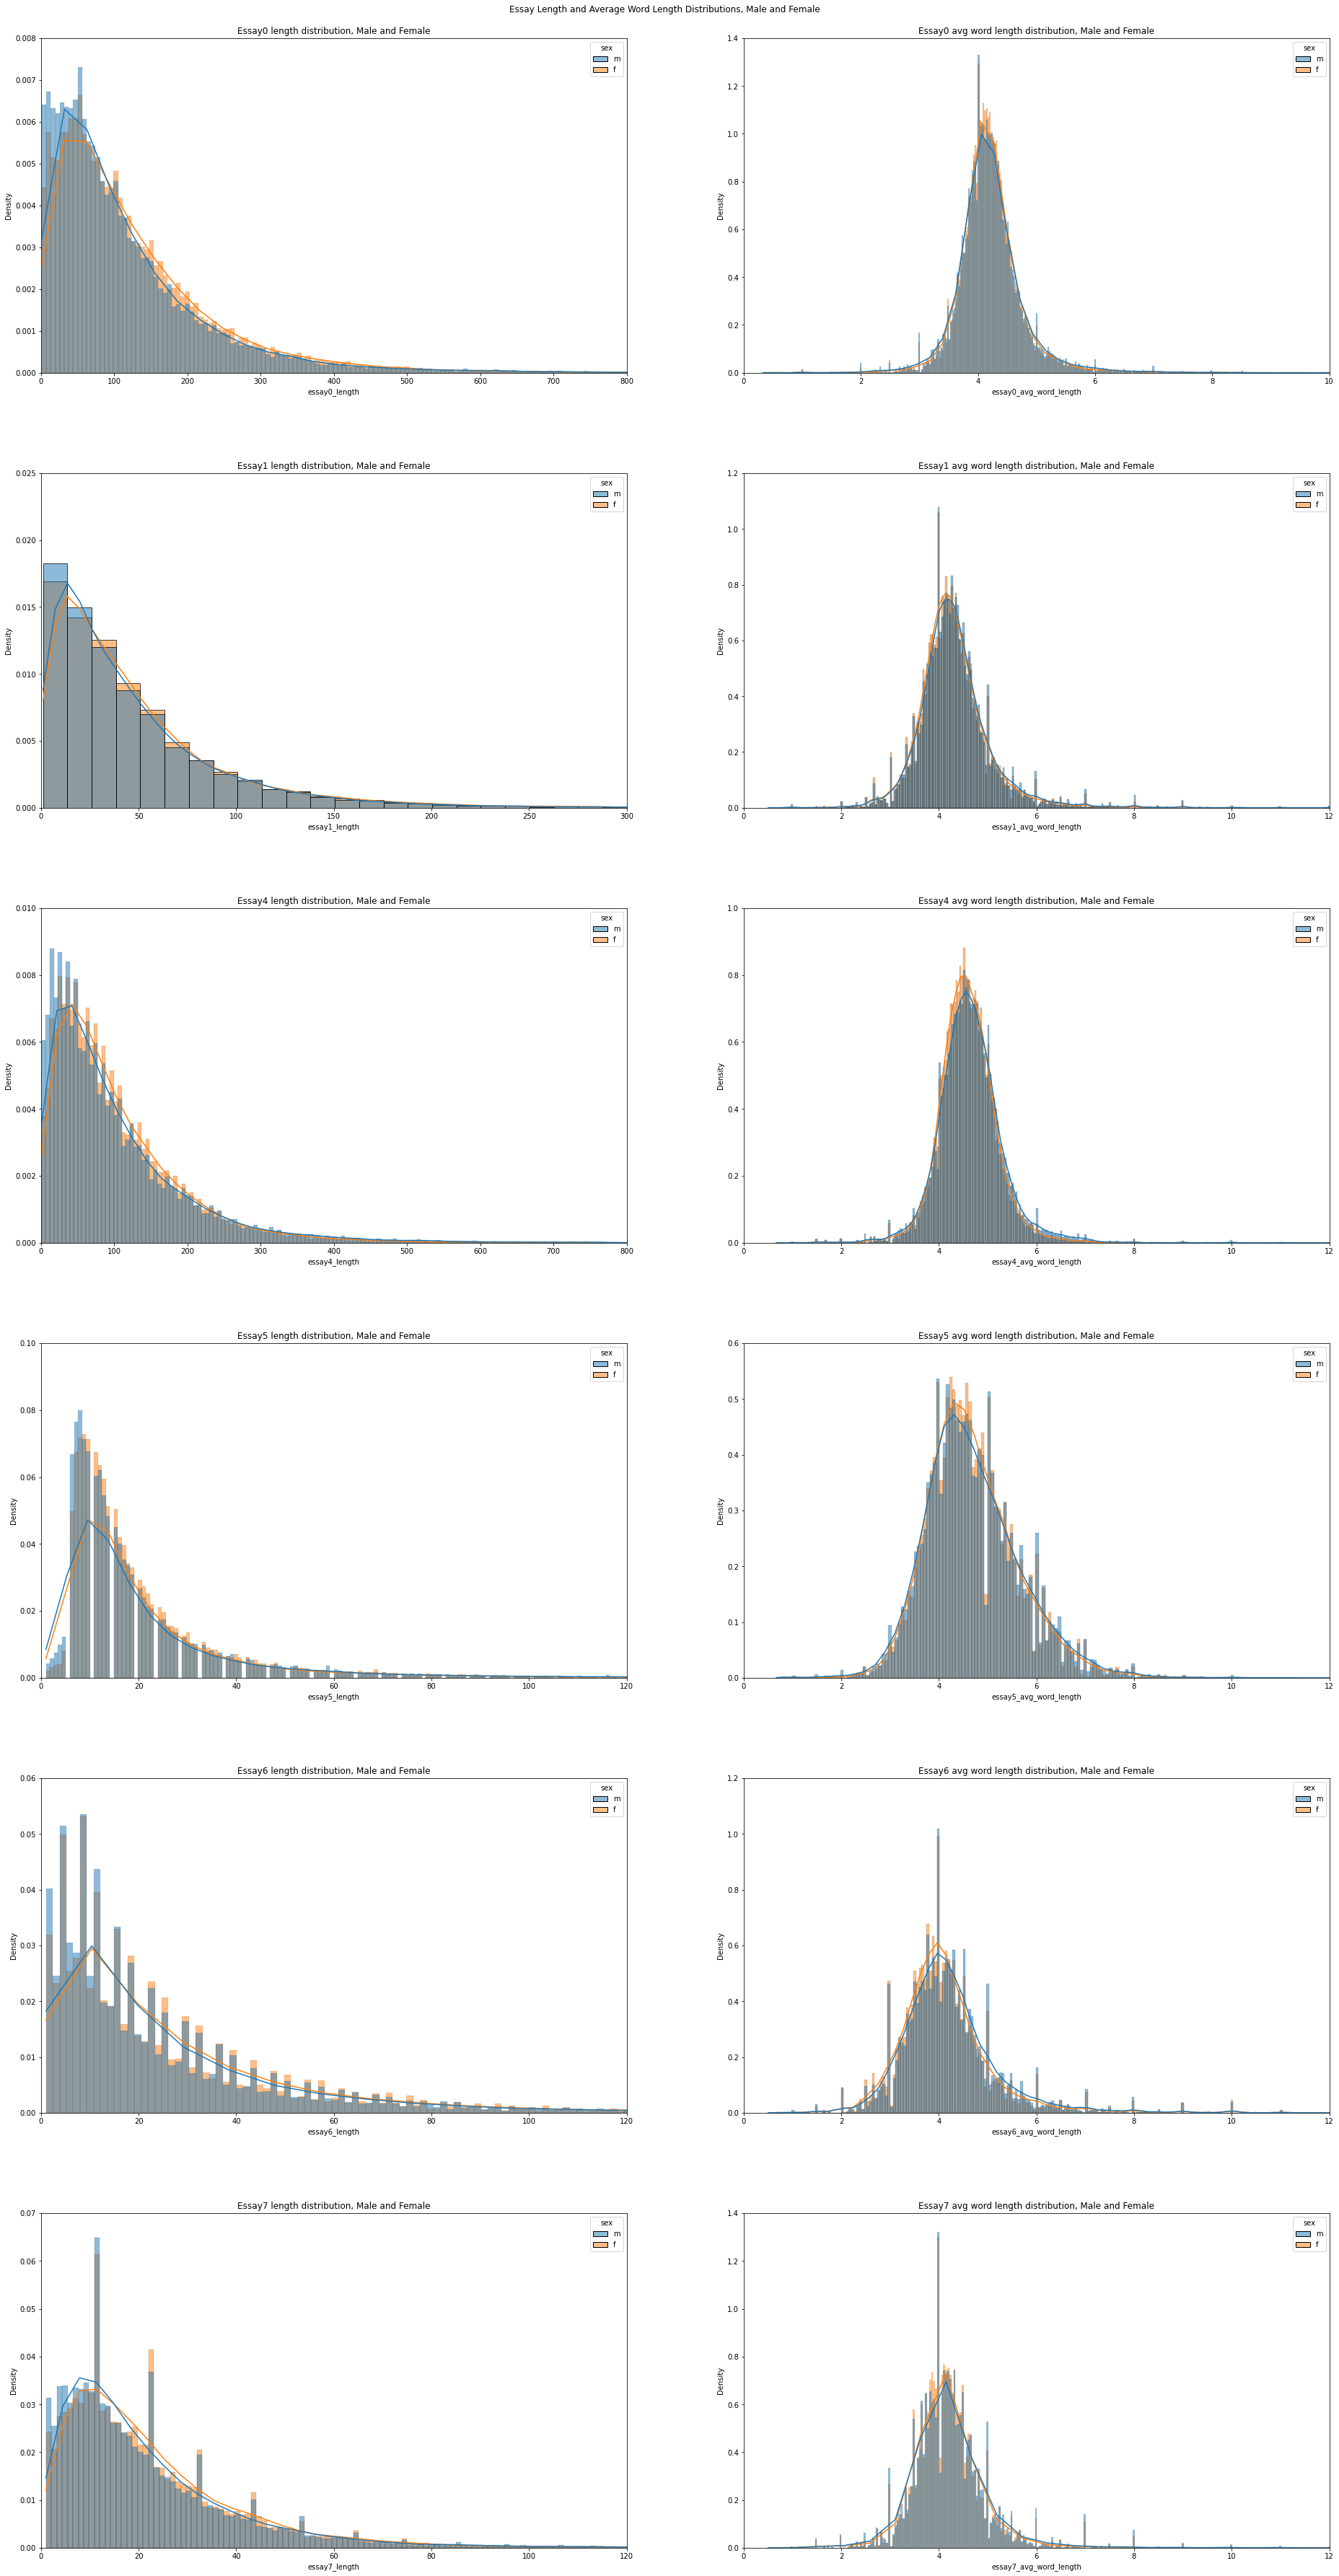

In [57]:
# For ease in plotting, separate out the data into 6 separate DataFrames, one for each essay. Make sure that only
# non-blank essays are included for plotting; since in section 5 I set blank essays (NaN values) to an empty 
# string (''), that basically means excluding those essays. Another way to satisfy this selection criterion,
# in light of the essay length-finding and average word length-finding I did in Section 7, is to demand that an
# essay's length be greater than 0.0 and that the average length of words in it is not 0.0. I elect to use the 
# latter selection critera below.
essay0_plotting_data = alldata[(alldata.essay0_length > 0.0) & (alldata.essay0_avg_word_length != 0.0)]
essay1_plotting_data = alldata[(alldata.essay1_length > 0.0) & (alldata.essay1_avg_word_length != 0.0)]
essay4_plotting_data = alldata[(alldata.essay4_length > 0.0) & (alldata.essay4_avg_word_length != 0.0)]
essay5_plotting_data = alldata[(alldata.essay5_length > 0.0) & (alldata.essay5_avg_word_length != 0.0)]
essay6_plotting_data = alldata[(alldata.essay6_length > 0.0) & (alldata.essay6_avg_word_length != 0.0)]
essay7_plotting_data = alldata[(alldata.essay7_length > 0.0) & (alldata.essay7_avg_word_length != 0.0)]

# Set up the figure. The figure will consist of 12 plots, arranged in 6 rows and 2 columns.
plt.figure(figsize=(32,64))

# Plot the essay0 length histograms split by sex in row 1 column 1:
plt.subplot(6,2,1)
sns.histplot(data=essay0_plotting_data, x="essay0_length", hue='sex', stat = 'density', \
              common_norm = False, kde = True)
plt.axis([0,800,0,0.008])
plt.title('Essay0 length distribution, Male and Female')

# Plot the essay0 average word length histograms split by sex in row 1 column 2:
plt.subplot(6,2,2)
sns.histplot(data=essay0_plotting_data, x="essay0_avg_word_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,10,0,1.4])
plt.title('Essay0 avg word length distribution, Male and Female')

# Plot the essay1 length histograms split by sex in row 2 column 1:
plt.subplot(6,2,3)
sns.histplot(data=essay1_plotting_data, x="essay1_length", hue='sex', bins = 100, stat = 'density', \
              common_norm = False, kde = True)
plt.axis([0,300,0,0.025])
plt.title('Essay1 length distribution, Male and Female')

# Plot the essay1 average word length histograms split by sex in row 2 column 2:
plt.subplot(6,2,4)
sns.histplot(data=essay1_plotting_data, x="essay1_avg_word_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,12,0,1.2])
plt.title('Essay1 avg word length distribution, Male and Female')

# Plot the essay4 length histograms split by sex in row 3 column 1:
plt.subplot(6,2,5)
sns.histplot(data=essay4_plotting_data, x="essay4_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,800,0,0.01])
plt.title('Essay4 length distribution, Male and Female')

# Plot the essay4 average word length histograms split by sex in row 3 column 2:
plt.subplot(6,2,6)
sns.histplot(data=essay4_plotting_data, x="essay4_avg_word_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,12,0,1.0])
plt.title('Essay4 avg word length distribution, Male and Female')

# Plot the essay5 length histograms split by sex in row 4 column 1:
plt.subplot(6,2,7)
sns.histplot(data=essay5_plotting_data, x="essay5_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,120,0,0.10])
plt.title('Essay5 length distribution, Male and Female')

# Plot the essay5 average word length histograms split by sex in row 4 column 2:
plt.subplot(6,2,8)
sns.histplot(data=essay5_plotting_data, x="essay5_avg_word_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,12,0,0.6])
plt.title('Essay5 avg word length distribution, Male and Female')

# Plot the essay6 length histograms split by sex in row 5 column 1:
plt.subplot(6,2,9)
sns.histplot(data=essay6_plotting_data, x="essay6_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,120,0,0.06])
plt.title('Essay6 length distribution, Male and Female')

# Plot the essay6 average word length histograms split by sex in row 5 column 2:
plt.subplot(6,2,10)
sns.histplot(data=essay6_plotting_data, x="essay6_avg_word_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,12,0,1.2])
plt.title('Essay6 avg word length distribution, Male and Female')

# Plot the essay7 length histograms split by sex in row 6 column 1:
plt.subplot(6,2,11)
sns.histplot(data=essay7_plotting_data, x="essay7_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,120,0,0.07])
plt.title('Essay7 length distribution, Male and Female')

# Plot the essay7 average word length histograms split by sex in row 6 column 2:
plt.subplot(6,2,12)
sns.histplot(data=essay7_plotting_data, x="essay7_avg_word_length", hue='sex', stat = 'density', \
             common_norm = False, kde = True)
plt.axis([0,12,0,1.4])
plt.title('Essay7 avg word length distribution, Male and Female')

# Allow for some space between plots:
plt.subplots_adjust(hspace=0.3)

# Give the figure an overall title, save it to file, display it to the output cell, and close it.
plt.suptitle('Essay Length and Average Word Length Distributions, Male and Female', x = 0.5, y = 0.89)
plt.savefig('essay_length_avg_word_length_dists.png')
plt.show()
plt.close('all')

Broadly speaking, the shapes of all the histograms are similar in each column. <br> 
The histogram pairs (male and female) in column 1 contain essay length information; they all feature an initial peak at small essay lengths, and display long tails toward longer essay lengths. The drop-off at longer essay lengths is certainly non-linear, probably power-law or exponential. The histogram data for essay 5 show a slight variation in this pattern, in that there is a small group of essays with very short lengths, then a peak, then a decay at long essay lengths. However, the shapes of the histograms in each plot are fairly similar between male and female, the only exception possibly being for essay 4  wherein the female essay length histogram seems to peak at slightly longer essay lengths than does the male histogram. <br>
The histogram pairs (male and female) in column 2 contain information about the average word lengths in essays. For essay0, both male and female histograms seem to follow a beautiful Gaussian curve, and there is not much difference between the two. The same is true for essay4, although the histogram for females seems to peak at a higher density value than does the histogram for males. The histogram pairs for the remaining essays look approximately normally distributed, slightly asymmetric in that they are skewed toward longer essay values. However, visually the histogram pairs have very similar shapes. <br>
In conclusion, from looking at the histograms, there doesn't seem to be a very strong association between either essay length or average length of words in essays and sex. It is dangerous to base conclusions on a possible association between variables on visual appearance, though; hypothesis tests should be run to determine if there is in fact an association between essay length/average length of words in essays and sex. <br>
I will need to run slightly different hypothesis tests to probe a possible association between essay length and sex and between average length of words in an essay and sex because the histograms have different shapes. A 2-sample t-test assumes normally distributed data, so this hypothesis test will be run to test for an association between average length of words in essays and sex. The null hypothesis in each case will be that the average average word length is the same for both distributions. (I readily admit, the average value of an average value is a dubious quantity, so take the hypothesis tests I run with a grain of salt.) Since the histograms of essay length are not normally distributed, a K-S test is the better hypothesis test to run. In each case, the null hypothesis will be that the male histogram and the female histogram are both sampled from the same underlying distribution.
A pre-determined significance threshold must be chosen. I choose a threshold of 0.01, as I did for the hypothesis tests run in section 4.

In [58]:
# gather male essay length, female essay length, male average word length, and female average word length into
# separate data Series for easier analysis:
m_essay0_length = essay0_plotting_data.essay0_length[essay0_plotting_data.sex == 'm']
m_essay0_avg_word_length = essay0_plotting_data.essay0_avg_word_length[essay0_plotting_data.sex == 'm']
f_essay0_length = essay0_plotting_data.essay0_length[essay0_plotting_data.sex == 'f']
f_essay0_avg_word_length = essay0_plotting_data.essay0_avg_word_length[essay0_plotting_data.sex == 'f']

# print out average and median values for each essay length distribution:
print('Average Male essay0 length: ' + str(np.round(np.mean(m_essay0_length),0)))
print('Median Male essay0 length: ' + str(np.median(m_essay0_length)))
print('Average Female essay0 length: ' + str(np.round(np.mean(f_essay0_length),0)))
print('Median Female essay0 length: ' + str(np.median(f_essay0_length)))

print('')

# run a K-S hypothesis test and print the results:
ksstat_0l_mf, kspval_0l_mf = ks_2samp(m_essay0_length,f_essay0_length)
print('K-S test p-value for Male and Female essay0 length test: '+ str(kspval_0l_mf))

print('')

# print out average and median values for each average word length distribution:
print('Average Male essay0 avg word length: ' + str(np.round(np.mean(m_essay0_avg_word_length),2)))
print('Median Male essay0 avg word length: ' + str(np.round(np.median(m_essay0_avg_word_length),2)))
print('Average Female essay0 avg word length: ' + str(np.round(np.mean(f_essay0_avg_word_length),2)))
print('Median Female essay0 avg word length: ' + str(np.round(np.median(f_essay0_avg_word_length),2)))

print('')

# Check to see if the ratio of standard deviations for the average word length histograms is 1; this is a step
# which should be done before a 2-sample t-test is run.
print('Ratio of standard deviatons: ' +\
      str(np.round(np.std(m_essay0_avg_word_length)/np.std(f_essay0_avg_word_length),2)))

print('')

# run a 2-sample t-test and print the results:
tstat_0awl_mf, ttestpval_0awl_mf = ttest_ind(m_essay0_avg_word_length, f_essay0_avg_word_length)
print('2-Sample t-test p-value for Male and Female avg word length test: '+ str(ttestpval_0awl_mf))

Average Male essay0 length: 116.0
Median Male essay0 length: 82.0
Average Female essay0 length: 125.0
Median Female essay0 length: 93.0

K-S test p-value for Male and Female essay0 length test: 9.889756891631532e-35

Average Male essay0 avg word length: 4.21
Median Male essay0 avg word length: 4.16
Average Female essay0 avg word length: 4.21
Median Female essay0 avg word length: 4.16

Ratio of standard deviatons: 1.19

2-Sample t-test p-value for Male and Female avg word length test: 0.9953868891714289


The p-value resulting from the K-S test run on the two essay length distributions is much smaller than the pre-chosen significance value, so I reject the null hypothesis for this case. It seems as though the two essay length distributions are drawn from different underlying populations. <br>
On the other hand, the 2-sample t-test run on the two average word length distributions is greater than the pre-chosen significance value, so I do NOT reject the null hypothesis in this case. The two averages for the two distributions are consistent with being the same.

In [59]:
# gather male essay length, female essay length, male average word length, and female average word length into
# separate data Series for easier analysis:
m_essay1_length = essay1_plotting_data.essay1_length[essay1_plotting_data.sex == 'm']
m_essay1_avg_word_length = essay1_plotting_data.essay1_avg_word_length[essay1_plotting_data.sex == 'm']
f_essay1_length = essay1_plotting_data.essay1_length[essay1_plotting_data.sex == 'f']
f_essay1_avg_word_length = essay1_plotting_data.essay1_avg_word_length[essay1_plotting_data.sex == 'f']

# print out average and median values for each essay length distribution:
print('Average Male essay1 length: ' + str(np.round(np.mean(m_essay1_length),0)))
print('Median Male essay1 length: ' + str(np.median(m_essay1_length)))
print('Average Female essay1 length: ' + str(np.round(np.mean(f_essay1_length),0)))
print('Median Female essay1 length: ' + str(np.median(f_essay1_length)))

print('')

# run a K-S hypothesis test and print the results:
ksstat_1l_mf, kspval_1l_mf = ks_2samp(m_essay1_length,f_essay1_length)
print('K-S test p-value for Male and Female essay1 length test: '+ str(kspval_1l_mf))

print('')

# print out average and median values for each average word length distribution:
print('Average Male essay1 avg word length: ' + str(np.round(np.mean(m_essay1_avg_word_length),2)))
print('Median essay1 avg word length: ' + str(np.round(np.median(m_essay1_avg_word_length),2)))
print('Average essay1 avg word length: ' + str(np.round(np.mean(f_essay1_avg_word_length),2)))
print('Median essay1 avg word length: ' + str(np.round(np.median(f_essay1_avg_word_length),2)))

print('')

# Check to see if the ratio of standard deviations for the average word length histograms is 1; this is a step
# which should be done before a 2-sample t-test is run.
print('Ratio of standard deviatons: '+\
      str(np.round(np.std(m_essay1_avg_word_length)/np.std(f_essay1_avg_word_length),2)))

print('')

# run a 2-sample t-test and print the results:
tstat_1awl_mf, ttestpval_1awl_mf = ttest_ind(m_essay1_avg_word_length, f_essay1_avg_word_length)
print('2-Sample t-test p-value for Male and Female essay1 avg word length test: '+ str(ttestpval_1awl_mf))

Average Male essay1 length: 47.0
Median Male essay1 length: 32.5
Average Female essay1 length: 49.0
Median Female essay1 length: 34.0

K-S test p-value for Male and Female essay1 length test: 2.3046511748649452e-08

Average Male essay1 avg word length: 4.33
Median essay1 avg word length: 4.25
Average essay1 avg word length: 4.29
Median essay1 avg word length: 4.22

Ratio of standard deviatons: 1.07

2-Sample t-test p-value for Male and Female essay1 avg word length test: 3.2082444241209546e-11


The p-values for each test are smaller than the <i>a priori</i>-chosen significance threshold, so I reject the null hypothesis in each case. It seems as though the two essay length distributions are drawn from different underlying populations, and that the average average word length is not the same between the two distributions.

In [60]:
# gather male essay length, female essay length, male average word length, and female average word length into
# separate data Series for easier analysis:
m_essay4_length = essay4_plotting_data.essay4_length[essay4_plotting_data.sex == 'm']
m_essay4_avg_word_length = essay4_plotting_data.essay4_avg_word_length[essay4_plotting_data.sex == 'm']
f_essay4_length = essay4_plotting_data.essay4_length[essay4_plotting_data.sex == 'f']
f_essay4_avg_word_length = essay4_plotting_data.essay4_avg_word_length[essay4_plotting_data.sex == 'f']

# print out average and median values for each essay length distribution:
print('Average Male essay4 length: ' + str(np.round(np.mean(m_essay4_length),0)))
print('Median Male essay4 length: ' + str(np.median(m_essay4_length)))
print('Average Female essay4 length: ' + str(np.round(np.mean(f_essay4_length),0)))
print('Median Female essay4 length: ' + str(np.median(f_essay4_length)))

print('')

# run a K-S hypothesis test and print the results:
ksstat_4l_mf, kspval_4l_mf = ks_2samp(m_essay4_length,f_essay4_length)
print('K-S test p-value for Male and Female essay4 length test: '+ str(kspval_4l_mf))

print('')

# print out average and median values for each average word length distribution:
print('Average Male essay4 avg word length: ' + str(np.round(np.mean(m_essay4_avg_word_length),2)))
print('Median Male essay4 avg word length: ' + str(np.round(np.median(m_essay4_avg_word_length),2)))
print('Average Female essay4 avg word length: ' + str(np.round(np.mean(f_essay4_avg_word_length),2)))
print('Median Female essay4 avg word length: ' + str(np.round(np.median(f_essay4_avg_word_length),2)))

print('')

# Check to see if the ratio of standard deviations for the average word length histograms is 1; this is a step
# which should be done before a 2-sample t-test is run.
print('Ratio of standard deviatons: '+\
      str(np.round(np.std(m_essay4_avg_word_length)/np.std(f_essay4_avg_word_length),2)))

print('')

# run a 2-sample t-test and print the results:
tstat_4awl_mf, ttestpval_4awl_mf = ttest_ind(m_essay4_avg_word_length, f_essay4_avg_word_length)
print('2-Sample t-test p-value for Male and Female avg word length test: '+ str(ttestpval_4awl_mf))

Average Male essay4 length: 104.0
Median Male essay4 length: 72.0
Average Female essay4 length: 103.0
Median Female essay4 length: 78.0

K-S test p-value for Male and Female essay4 length test: 8.791598909993478e-24

Average Male essay4 avg word length: 4.65
Median Male essay4 avg word length: 4.61
Average Female essay4 avg word length: 4.59
Median Female essay4 avg word length: 4.57

Ratio of standard deviatons: 1.16

2-Sample t-test p-value for Male and Female avg word length test: 5.948727159376286e-24


The p-values for each test are smaller than the <i>a priori</i>-chosen significance threshold, so I reject the null hypothesis in each case. It seems as though the two essay length distributions are drawn from different underlying populations, and that the average average word length is not the same between the two distributions. 

In [61]:
# gather male essay length, female essay length, male average word length, and female average word length into
# separate data Series for easier analysis:
m_essay5_length = essay5_plotting_data.essay5_length[essay5_plotting_data.sex == 'm']
m_essay5_avg_word_length = essay5_plotting_data.essay5_avg_word_length[essay5_plotting_data.sex == 'm']
f_essay5_length = essay5_plotting_data.essay5_length[essay5_plotting_data.sex == 'f']
f_essay5_avg_word_length = essay5_plotting_data.essay5_avg_word_length[essay5_plotting_data.sex == 'f']

# print out average and median values for each essay length distribution:
print('Average Male essay5 length: ' + str(np.round(np.mean(m_essay5_length),0)))
print('Median Male essay5 length: ' + str(np.median(m_essay5_length)))
print('Average Female essay5 length: ' + str(np.round(np.mean(f_essay5_length),0)))
print('Median Female essay5 length: ' + str(np.median(f_essay5_length)))

print('')

# run a K-S hypothesis test and print the results:
ksstat_5l_mf, kspval_5l_mf = ks_2samp(m_essay5_length,f_essay5_length)
print('K-S test p-value for Male and Female essay5 length test: '+ str(kspval_5l_mf))

print('')

# print out average and median values for each average word length distribution:
print('Average Male essay5 avg word length: ' + str(np.round(np.mean(m_essay5_avg_word_length),2)))
print('Median Male essay5 avg word length: ' + str(np.round(np.median(m_essay5_avg_word_length),2)))
print('Average Female essay5 avg word length: ' + str(np.round(np.mean(f_essay5_avg_word_length),2)))
print('Median Female essay5 avg word length: ' + str(np.round(np.median(f_essay5_avg_word_length),2)))

print('')

# Check to see if the ratio of standard deviations for the average word length histograms is 1; this is a step
# which should be done before a 2-sample t-test is run.
print('Ratio of standard deviatons: '+\
      str(np.round(np.std(m_essay5_avg_word_length)/np.std(f_essay5_avg_word_length),2)))

print('')

# run a 2-sample t-test and print the results:
tstat_5awl_mf, ttestpval_5awl_mf = ttest_ind(m_essay5_avg_word_length, f_essay5_avg_word_length)
print('2-Sample t-test p-value for Male and Female avg word length test: '+ str(ttestpval_5awl_mf))

Average Male essay5 length: 22.0
Median Male essay5 length: 14.0
Average Female essay5 length: 22.0
Median Female essay5 length: 15.0

K-S test p-value for Male and Female essay5 length test: 1.8759641504115709e-19

Average Male essay5 avg word length: 4.7
Median Male essay5 avg word length: 4.57
Average Female essay5 avg word length: 4.69
Median Female essay5 avg word length: 4.57

Ratio of standard deviatons: 1.05

2-Sample t-test p-value for Male and Female avg word length test: 0.4207131367413094


The p-value resulting from the K-S test run on the two essay length distributions is much smaller than the pre-chosen significance value, so I reject the null hypothesis for this case. It seems as though the two essay length distributions are drawn from different underlying populations. <br>
On the other hand, the 2-sample t-test run on the two average word length distributions is greater than the pre-chosen significance value, so I do NOT reject the null hypothesis in this case. The two averages for the two distributions are consistent with being the same.

In [62]:
# gather male essay length, female essay length, male average word length, and female average word length into
# separate data Series for easier analysis:
m_essay6_length = essay6_plotting_data.essay6_length[essay6_plotting_data.sex == 'm']
m_essay6_avg_word_length = essay6_plotting_data.essay6_avg_word_length[essay6_plotting_data.sex == 'm']
f_essay6_length = essay6_plotting_data.essay6_length[essay6_plotting_data.sex == 'f']
f_essay6_avg_word_length = essay6_plotting_data.essay6_avg_word_length[essay6_plotting_data.sex == 'f']

# print out average and median values for each essay length distribution:
print('Average Male essay6 length: ' + str(np.round(np.mean(m_essay6_length),0)))
print('Median Male essay6 length: ' + str(np.median(m_essay6_length)))
print('Average Female essay6 length: ' + str(np.round(np.mean(f_essay6_length),0)))
print('Median Female essay6 length: ' + str(np.median(f_essay6_length)))

print('')

# run a K-S hypothesis test and print the results:
ksstat_6l_mf, kspval_6l_mf = ks_2samp(m_essay6_length,f_essay6_length)
print('K-S test p-value for Male and Female essay6 length test: '+ str(kspval_6l_mf))

print('')

# print out average and median values for each average word length distribution:
print('Average Male essay6 avg word length: ' + str(np.round(np.mean(m_essay6_avg_word_length),0)))
print('Median Male essay6 avg word length: ' + str(np.round(np.median(m_essay6_avg_word_length),1)))
print('Average Female essay6 avg word length: ' + str(np.round(np.mean(f_essay6_avg_word_length),0)))
print('Median Female essay6 avg word length: ' + str(np.round(np.median(f_essay6_avg_word_length),1)))

print('')

# Check to see if the ratio of standard deviations for the average word length histograms is 1; this is a step
# which should be done before a 2-sample t-test is run.
print('Ratio of standard deviatons: '+\
      str(np.round(np.std(m_essay6_avg_word_length)/np.std(f_essay6_avg_word_length),2)))

print('')

tstat_6awl_mf, ttestpval_6awl_mf = ttest_ind(m_essay6_avg_word_length, f_essay6_avg_word_length)
print('2-Sample t-test p-value for Male and Female essay6 avg word length test: '+ str(ttestpval_6awl_mf))

Average Male essay6 length: 27.0
Median Male essay6 length: 16.0
Average Female essay6 length: 27.0
Median Female essay6 length: 17.0

K-S test p-value for Male and Female essay6 length test: 9.077840969948307e-11

Average Male essay6 avg word length: 4.0
Median Male essay6 avg word length: 4.1
Average Female essay6 avg word length: 4.0
Median Female essay6 avg word length: 4.0

Ratio of standard deviatons: 1.07

2-Sample t-test p-value for Male and Female essay6 avg word length test: 1.0466131912370356e-22


The p-values for each test are smaller than the <i>a priori</i>-chosen significance threshold, so I reject the null hypothesis in each case. It seems as though the two essay length distributions are drawn from different underlying populations, and that the average average word length is not the same between the two distributions.

In [63]:
# gather male essay length, female essay length, male average word length, and female average word length into
# separate data Series for easier analysis:
m_essay7_length = essay7_plotting_data.essay7_length[essay7_plotting_data.sex == 'm']
m_essay7_avg_word_length = essay7_plotting_data.essay7_avg_word_length[essay7_plotting_data.sex == 'm']
f_essay7_length = essay7_plotting_data.essay7_length[essay7_plotting_data.sex == 'f']
f_essay7_avg_word_length = essay7_plotting_data.essay7_avg_word_length[essay7_plotting_data.sex == 'f']

# print out average and median values for each essay length distribution:
print('Average Male essay7 length: ' + str(np.round(np.mean(m_essay7_length),0)))
print('Median Male essay7 length: ' + str(np.median(m_essay7_length)))
print('Average Female essay7 length: ' + str(np.round(np.mean(f_essay7_length),0)))
print('Median Female essay7 length: ' + str(np.median(f_essay7_length)))

print('')

# run a K-S hypothesis test and print the results:
ksstat_7l_mf, kspval_7l_mf = ks_2samp(m_essay7_length,f_essay7_length)
print('K-S test p-value for Male and Female essay7 length test: '+ str(kspval_7l_mf))

print('')

# print out average and median values for each average word length distribution:
print('Average Male essay7 avg word length: ' + str(np.round(np.mean(m_essay7_avg_word_length),0)))
print('Median Male essay7 avg word length: ' + str(np.round(np.median(m_essay7_avg_word_length),1)))
print('Average Female essay7 avg word length: ' + str(np.round(np.mean(f_essay7_avg_word_length),0)))
print('Median Female essay7 avg word length: ' + str(np.round(np.median(f_essay7_avg_word_length),1)))

print('')

# Check to see if the ratio of standard deviations for the average word length histograms is 1; this is a step
# which should be done before a 2-sample t-test is run.
print('Ratio of standard deviatons: '+\
      str(np.round(np.std(m_essay6_avg_word_length)/np.std(f_essay6_avg_word_length),2)))

print('')

tstat_7awl_mf, ttestpval_7awl_mf = ttest_ind(m_essay7_avg_word_length, f_essay7_avg_word_length)
print('2-Sample t-test p-value for Male and Female essay7 avg word length test: '+ str(ttestpval_7awl_mf))

Average Male essay7 length: 22.0
Median Male essay7 length: 16.0
Average Female essay7 length: 23.0
Median Female essay7 length: 17.0

K-S test p-value for Male and Female essay7 length test: 2.3496707206559315e-17

Average Male essay7 avg word length: 4.0
Median Male essay7 avg word length: 4.1
Average Female essay7 avg word length: 4.0
Median Female essay7 avg word length: 4.1

Ratio of standard deviatons: 1.07

2-Sample t-test p-value for Male and Female essay7 avg word length test: 0.0004899508100387085


The p-values for each test are smaller than the <i>a priori</i>-chosen significance threshold, so I reject the null hypothesis in each case. It seems as though the two essay length distributions are drawn from different underlying populations, and that the average average word length is not the same between the two distributions.

In conclusion, the only two variables that <i>aren't</i> associated with sex are essay0 average word length and essay5 average word length; everything else seems to be associated with sex. This surprises me based on the appearances of the histograms, but this is a prime example of why basing conclusions on visual appearances can be dangerous. However, I freely admit that taking an average of average word lengths is a bit of a dubious undertaking, and I am aware of the dangers of running too many hypothesis tests on a data set. I could also have introduced some bias into the above results given the judgement calls I made in removing noise from the essays, so the above conclusions should probably be taken with a grain of salt. <br> 
Now that I know which quantitative essay properties are associated with sex, I am in a good position to build ML classification models based on the data at hand.

<h3> 9. Predicting Sex Using Quantitative Data </h3>

At face value at least, there are quite a number of quantitative variables which are associated with sex: age, height, drinking habits (when converted to a numerical scale), drug use habits (when converted to a numerical scale), smoking habits (when converted to a numerical scale), the lengths of essays 0, 1, 4, 5, 6, and 7, and the average lengths of words in essays 1, 4, 6, and 7. This is quite a lot of data which could be passed off to a machine learning (ML) algorithm to try and find a model which predicts sex based on these quantitative features. The question now becomes, which model to choose? There are several attractive options for predicting a binary categorical variable such as sex: I will investigate three such models. First, I will build a k-Nearest Neighbours model to predict sex based on all quantitative features I found to be associated with sex; then, I will trim the features back to see if I can do "more with less," as it were. Then, I will build a logistic regression model to predict sex based on all quantitative features "known" to be associated with sex and explore the role of height in building a good predictive model. Lastly, I will build a Support Vector Machine (SVM) model to predict sex based on all quantitative features "known" to be associated with sex. The main criteria which I shall use to evaluate my models is accuracy, but I will consider precision and recall as well. (I defined these terms in section 6.) Similar to what I did in section 6, I will also look at the output confusion matrix for each model when run on the test data subset to see which sex the model is "better" at "finding," and to further evaluate the model.

<h5> Model 1: k-Nearest Neighbours </h5>

Below, I build two k-Nearest Neighbours models which predict sex based on the quantitative features I found to be associated with sex. I will not go into a full discussion of what a k-Nearest Neighbours model is, but the basic idea is that intrinsically similar things tend to have similar quantitative features, so they should "cluster" together in the n-dimensional quantitative features space of the data. If one finds the "distance" between data points in that n-dimensional space, the nearest things in "distance" to a particular data point should be intrinsically similar to it, and so that data point should be classified the same as those closest in "distance" to it. Obviously, the "clustering" is not pure, so in practice the majority classification is assigned to the data point. Here I put "distance" in quotes because it's not quite a distance like we are used to thinking about in terms of the 2-dimensional surface of the Earth (or 3-dimensions of Earth's surface and elevation above that surface); it's just a value that is calculated in a similar way, namely by taking the difference between a data point's quantitative feature and its neighbours, squaring those differences, adding them up, and taking the square root. <br>
Before "building" a k-Nearest Neighbours ML model of the data, I need to select the data that gets "fed" to the k-Nearest Neighbours algorithm. Not all columns of the "alldata" DataFrame will be passed to the algorithm. I will also need to make sure that there aren't any null values in the data I "feed" to the algorithm. I take care of these tasks below.

In [64]:
# drop rows for which data about age, height, drinks, drugs, and/or smokes is not present:
question_1_data = alldata.dropna(subset = ['age','height','drinks_num_scale','drugs_num_scale','smokes_num_scale'])

# drop rows which contained no essay information (recall that such essays were set to an empty string in section 5):
question_1_data = question_1_data[(question_1_data.essay0_length > 0.0) & \
                                  (question_1_data.essay0_avg_word_length != 0.0)]
question_1_data = question_1_data[(question_1_data.essay1_length > 0.0) & \
                                  (question_1_data.essay1_avg_word_length != 0.0)]
question_1_data = question_1_data[(question_1_data.essay4_length > 0.0) & \
                                  (question_1_data.essay4_avg_word_length != 0.0)]
question_1_data = question_1_data[(question_1_data.essay5_length > 0.0) & \
                                  (question_1_data.essay5_avg_word_length != 0.0)]
question_1_data = question_1_data[(question_1_data.essay6_length > 0.0) & \
                                  (question_1_data.essay6_avg_word_length != 0.0)]
question_1_data = question_1_data[(question_1_data.essay7_length > 0.0) & \
                                  (question_1_data.essay7_avg_word_length != 0.0)]

# from the remaining data, select only those quantitative features "known" to be associated with sex and 
# gather them all into one DataFrame:
predict_sex_data = question_1_data[['age','height', 'drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                    'essay0_length', 'essay1_length', \
                                    'essay4_length', 'essay5_length', \
                                    'essay6_length', 'essay7_length', \
                                    'essay1_avg_word_length', 'essay4_avg_word_length',  \
                                    'essay6_avg_word_length', 'essay7_avg_word_length']]

# make a separate data Series of sex, which is what I aim to predict. For ease in model evaluation, use the 
# "sex_binary" column constructed in secion 5 rather than the "sex" column itself:
predict_sex_labels = question_1_data['sex_binary']

# make sure that the data DataFrame and labels Series have the same length, as a sanity check:
print(len(predict_sex_data), len(predict_sex_labels))

26653 26653


The k-Nearest Neighbours algorithm is a supervised ML algorithm and so relies on using a subset of the data for "training." I also need to "store away" some data in a test set, to evaluate my model after it has been "trained." Additionally, I need to choose the optimal value of k (i.e., the number of nearest neighbours to consider when classifying a data point) since it is not known <i>a priori</i>; I don't want to use the test set to decide on k, so I will have to set aside some data that isn't the training set used to train the model or the test set used to evaluate its performance; I will call that additional "set aside data" the "validation" set, as this is the nomenclature used for such a data subset in the machine learning literature. Similar to what I did in section 6, I will use the scikit-learn method train_test_split() to split the "predict_sex_data" DataFrame into training, validation, and test subsets. This time, I will set aside 10% of the data as the validation subset and 15% as the test subset; this means that 75% of the data will be the training subset used to train the model. Once again, I will specify a random state to seed the dividing of the data into training, validation, and test sets; this ensure that the same splitting occurs each time the function is run.

In [65]:
# Define the fraction of data to go into the training, validation, and test subsets:
train_frac = 0.75
valid_frac = 0.10
test_frac = 0.15
adj_valid_frac = valid_frac / (1.0 - test_frac)

# Split the data into test and  sets:
feat_nottest_q1, feat_test_q1, labels_nottest_q1, labels_test_q1 =  \
      train_test_split(predict_sex_data, predict_sex_labels, test_size = test_frac, random_state = 49)

# Now split the "nottest" set into training and validation sets:
feat_train_q1, feat_valid_q1, labels_train_q1, labels_valid_q1 =  \
      train_test_split(feat_nottest_q1, labels_nottest_q1, test_size = adj_valid_frac, random_state = 49)

# Print out the lengths of the full data set and the training, validation, and tets data subsets to make sure nothing
# blatantly obvious has gone wrong:
print(len(predict_sex_data))
print(len(feat_train_q1))
print(len(feat_valid_q1))
print(len(feat_test_q1))

26653
19989
2666
3998


One important thing to keep in mind when training a k-Nearest Neighbours algorithm is that, because it calculates "distances" between data points, if one or more features is on a vastly different scale than the others that feature or features may dominate the distance calculation. In this data set in particular, essay lengths can go into the hundreds of characters, while drinks_num_scale, drugs_num_scale, and smokes_num_scale don't go past a value of 5. To ensure that data with large values doesn't dominate the "distance" calculation over data with small values, I will scale the data before passing it on to the k-Nearest Neighbours algorithm. I choose to do this using the scikit-learn class MinMaxScaler(), which scales each feature individually such that it lies between zero and one. The specific scaling algorithm used by MinMaxScaler() can be found at https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html. I use MinMaxScaler() rather than the normalization class StandardScaler() because StandardScaler() implicitly assumes that the data are normally distributed, which for most of the quantitative features in this data set is not the case. Thus to scale the data, I will fit a MinMaxScaler() object to the training data subset and apply the fit object to the training and validation data subsets.

In [66]:
# instantiate a MinMaxScaler object:
stdscale1 = MinMaxScaler()
# fit the object to the training data, and use that fit object to scale the training, validation, and test data subsets:
scaled_feat_nottest_q1 = stdscale1.fit_transform(feat_nottest_q1)
scaled_feat_train_q1 = stdscale1.transform(feat_train_q1)
scaled_feat_valid_q1 = stdscale1.transform(feat_valid_q1)
scaled_feat_test_q1 = stdscale1.transform(feat_test_q1)

Now that the training, validation, and test data subsets have been appropriately scaled, it is time to "build" the k-Nearest Neighbours classification model which predicts an OK Cupid user's sex based on the quantitative features detailed above. I should note that it is not immediately obvious how many neighbours should "count" as "nearest neighbours" when making classifications of new data points, so I consider a range of neighbour numbers k and keep the one which results in the highest validation accuracy. The model is "built" below.

In [67]:
# initialize an empty list:
scores_knn_q1 = []

# loop over values of k (nearest neighbours):
for k in range(1,301):
    # instantiate a k-Nearest Neighbours classifier based on the current number of nearest neighbours:
    classifier = KNeighborsClassifier(n_neighbors = k)
    # train the clasifier on the training data:
    classifier.fit(scaled_feat_train_q1, labels_train_q1)
    # add the current accuracy score to the list of accuracy scores initialized above:
    scores_knn_q1.append(classifier.score(scaled_feat_valid_q1, labels_valid_q1))
    
# print out what the optimum number of nearest neighbours was, and what accuracy score that model achieved:
print('k of Max.: ' + str(scores_knn_q1.index(max(scores_knn_q1))+1))
print('Max. Validation Accuracy: ' + str(max(scores_knn_q1)))

k of Max.: 17
Max. Validation Accuracy: 0.781695423855964


The best accuracy this model is able to achieve on the validation set is 78.2%, which is better than either of my Multinomial Naïve Bayes classification models was able to achieve. I also note that the model's accuracy changes with k in a manner that I expect: see the code below for a visualization of model accuracy vs. k. One can clearly see that accuracy rises as the number of neighbours considered increases, reaches a peak when 17 neighbours are used to classify an unknown point, and then falls as k continues to increase and the model becomes increasingly more underfit. That doesn't necessarily make the current k-Nearest Neighbours classification model a great one, but it does pass an important sanity check that nothing blatantly obvious seems to be going wrong.

Text(0.5, 1.0, 'Model Validation Accuracy as a Function of k')

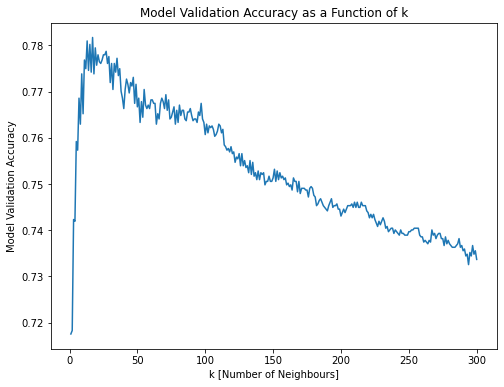

In [68]:
plt.figure(figsize=(8,6))
plt.plot(range(1,301),scores_knn_q1)
plt.xlabel('k [Number of Neighbours]')
plt.ylabel('Model Validation Accuracy')
plt.title('Model Validation Accuracy as a Function of k')

Just like I did for the Multinomial Naïve Bayes classification models I "built" in section 6, I will now investigate the accuracy, precision and recall scores of the "final" k-Nearest Neighbours model, as well as its confusion matrix. First, though, I will have to pick a number of nearest neighbours to use for the final model; I said above that I would keep the k which resulted in the highest validation accuracy, so the number of neighbours I will use is 17. I'll also need to ask the classifier to make some predictions in order to evaluate accuracy, precision, recall, and the confusion matrix. <br>
Note that I will be using the combined training+validation data set, which I called "nottest" above, to train the final k-Nearest Neighbours model. Thus I am treating the "nottest" set as the overarching training data set, which I had further split into "training" and "validation" subsets to fine tune the k of the k-Nearest Neighbours model. I credit Stuart Russell and Peter Norvig, as quoted by https://machinelearningmastery.com/difference-test-validation-datasets/, for this idea:<br>
"If the test set is locked away, but you still want to measure performance on unseen data as a way of selecting a good hypothesis, then divide the available data (without the test set) into a training set and a validation set." <br>
https://machinelearningmastery.com/difference-test-validation-datasets/ cites the above quote as having come from Stuart Russell and Peter Norvig, page 709, Artificial Intelligence: A Modern Approach, 2009 (3rd edition). <br>
The approach of taking everything but the test set and splitting it into training and validation subsets is precisely what I did. Now, to train the final model, I "recombine" the training and validation sets into that original "everything but the test" set.

In [69]:
# build the "final" k-Nearest Neighbours model for k=23 (which resulted in the highest model accuracy above)
knn_classifier_q1 = KNeighborsClassifier(n_neighbors = scores_knn_q1.index(max(scores_knn_q1))+1)
knn_classifier_q1.fit(scaled_feat_nottest_q1, labels_nottest_q1)

# "ask" the model to classify the data in the validation data subset:
knn_labels_predictions_q1 = knn_classifier_q1.predict(scaled_feat_test_q1)

# convert the labels Series to a NumPy array in order to pass to later model evaluation functions:
labels_test_q1_array = np.array(labels_test_q1.tolist())

# calculate the model's accuracy score, recall score, and precision score:
knn_classifier_score_q1 = knn_classifier_q1.score(scaled_feat_test_q1, labels_test_q1)
knn_recall_score_q1 = recall_score(labels_test_q1_array, knn_labels_predictions_q1)
knn_precision_score_q1 = precision_score(labels_test_q1_array, knn_labels_predictions_q1)

# print out the results of the above evaluations:
print('Accuracy score: ' + str(np.round(knn_classifier_score_q1,3)))
print('Precision score: ' + str(np.round(knn_precision_score_q1,3)))
print('Recall score: ' + str(np.round(knn_recall_score_q1,3)))
print('Confusion Matrix:')
print(confusion_matrix(labels_test_q1, knn_labels_predictions_q1))

Accuracy score: 0.783
Precision score: 0.778
Recall score: 0.646
Confusion Matrix:
[[2093  297]
 [ 569 1039]]


The model above boasts an accuracy of 78.3%, which is decidedly better than random. (If one were to guess "male" at random, one would be right 60% of the time as the data set is about 60% male.) While the recall score of 64.6% is mediocre, the precision score of 77.8% is impressive. In order to investigate why the recall score is so low compared to the model's accuracy and precision scores, I look at the confusion matrix. The format of this matrix is:<br>
<table>
   <tr>
     <td>predict male true male</td>
     <td>predict female true male</td>
   </tr>
   <tr>
     <td>predict male true female</td>
     <td>predict female true female</td>
   </tr>
</table>
In other words, the off-diagonal terms are the misclassifications for each sex. The model seems to mis-classify roughly 10% of males and roughly 40% of females, so while it does a great job of "finding" males it is bad at finding females. Calculating those percentages more accurately ... <br>
male misclassifications: $\frac{297}{2093+297} = 12\%$  <br>
female misclassifications: $\frac{569}{569+1039} = 35\%$  <br>
As was the case with the first Multinomial Naïve Bayes classification model I built in section 6, this k-Nearest Neighbours classifier is very good at "finding" males, but pretty bad at "finding" females: the model seems to be biased toward "finding" males. That is problematic, so I try to build a better model below.

Recall that in sections 5 and 7, I mentioned that I made several judgement calls about what to remove when removing noise from the essay data in the OK Cupid data Codecademy provided me: I treated HTML links as noise, removed what seemed to be decorative text, and made a few other case-by-case removals. While the small number of case-by-case removals of section 7 shouldn't have a large impact on the ML models I build, removing hyperlinks might. I said in section 5 that I could be introducing bias into the data by removing HTML links, so I will investigate if that seems to be the case. I now build a k-Nearest Neighbours classification model which does not rely upon any essay data at all; I will instead use age, height, drinks_num_scale, drugs_num_scale, and smokes_num_scale to try and predict sex, as those columns will be completely unaffected by any noise removal I conducted on the essay data. In order to facilitate the most fair comparison between models possible, I use the same question_1_data DataFrame to select the features I "feed" to my new model, and I will keep the same training/validation/test data subset percentages as well as the same initial random state. 

In [70]:
# from the question_1_data DataFrame, select only certain quantitative features "known" to be associated with sex and 
# gather them all into one DataFrame:
predict_sex_data_1a = question_1_data[['age','height', 'drinks_num_scale','drugs_num_scale','smokes_num_scale']]

# make a separate data Series of sex_binary, which is what I aim to predict:
predict_sex_labels_1a = question_1_data['sex_binary']

# make sure that the data DataFrame and labels Series have the same length, as a sanity check:
print(len(predict_sex_data_1a), len(predict_sex_labels_1a))

26653 26653


In [71]:
# split the data into training, validation, and test subsets as described above:
train_frac = 0.75
valid_frac = 0.10
test_frac = 0.15
adj_valid_frac = valid_frac / (1.0 - test_frac)

feat_nottest_q1a, feat_test_q1a, labels_nottest_q1a, labels_test_q1a =  \
      train_test_split(predict_sex_data_1a, predict_sex_labels_1a, test_size = test_frac, random_state = 49)

feat_train_q1a, feat_valid_q1a, labels_train_q1a, labels_valid_q1a =  \
      train_test_split(feat_nottest_q1a, labels_nottest_q1a, test_size = adj_valid_frac, random_state = 49)

# scale the training, validation, and test data subsets using MinMaxScaler():
stdscale1a = MinMaxScaler()
scaled_feat_nottest_q1a = stdscale1a.fit_transform(feat_nottest_q1a)
scaled_feat_train_q1a = stdscale1a.transform(feat_train_q1a)
scaled_feat_valid_q1a = stdscale1a.transform(feat_valid_q1a)
scaled_feat_test_q1a = stdscale1a.transform(feat_test_q1a)

# Print out the lengths of the full data set and the training, validation, and tets data subsets to make sure nothing
# blatantly obvious has gone wrong:
print(len(predict_sex_data_1a))
print(len(feat_train_q1a))
print(len(feat_valid_q1a))
print(len(feat_test_q1a))

26653
19989
2666
3998


In [72]:
# initialize an empty list:
scores_knn_q1a = []

# loop over values of k (nearest neighbours):
for k in range(1,301):
    # instantiate a k-Nearest Neighbours classifier based on the current number of nearest neighbours:
    classifier = KNeighborsClassifier(n_neighbors = k)
    # train the clasifier on the training data:
    classifier.fit(scaled_feat_train_q1a, labels_train_q1a)
    # add the current accuracy score to the list of accuracy scores initialized above:
    scores_knn_q1a.append(classifier.score(scaled_feat_valid_q1a, labels_valid_q1a))
    
# print out what the optimum number of nearest neighbours was, and what accuracy score that model achieved:
print('k of Max.: ' + str(scores_knn_q1a.index(max(scores_knn_q1a))+1))
print('Max. Validaton Accuracy: ' + str(max(scores_knn_q1a)))

k of Max.: 17
Max. Validaton Accuracy: 0.8109527381845462


The maximum validation accuracy of the present k-Nearest Neighbours model is a little better the maximum validation accuracy of my previous model. This indicates to me that, while the essay length and average word length calculations that I did may or may not have been biased, they had very little effect on the model. If anything, removing essay length and average word length data improved model accuracy ... but not by much, only 2.9%. Removal of the essay data also speeded up the algorithm significantly, which is a not insignificant factor when considering a ML model to be applied to a data set. <br>
Let me graph model accuracy as a function of k to see if the trend of accuracy with increasing k still matches what I expect:

Text(0.5, 1.0, 'Model Validation Accuracy as a Function of k')

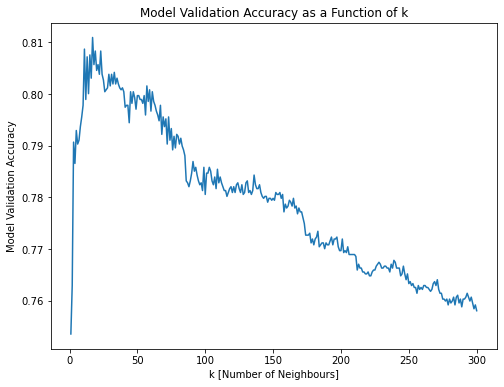

In [73]:
plt.figure(figsize=(8,6))
plt.plot(range(1,301),scores_knn_q1a)
plt.xlabel('k [Number of Neighbours]')
plt.ylabel('Model Validation Accuracy')
plt.title('Model Validation Accuracy as a Function of k')

It does. The shape of the above plot is extremely similar to the previous one, and it even peaks at the same value of k. The fall-off of validation accuracy with k isn't quite as steep for the above plot as it was for the previous plot, though.<br>
Now I will evaluate the current model's accuracy, precision and recall, as well as determine its confusion matrix:

In [74]:
# build the "final" k-Nearest Neighbours model for k=17 (which resulted in the highest model accuracy above)
knn_classifier_q1a = KNeighborsClassifier(n_neighbors = scores_knn_q1a.index(max(scores_knn_q1a))+1)
knn_classifier_q1a.fit(scaled_feat_nottest_q1a, labels_nottest_q1a)

# "ask" the model to classify the data in the validation data subset:
knn_labels_predictions_q1a = knn_classifier_q1a.predict(scaled_feat_test_q1a)

# convert the labels Series to a NumPy array in order to pass to later model evaluation functions:
labels_test_q1a_array = np.array(labels_test_q1a.tolist())

# calculate the model's accuracy score, recall score, and precision score:
knn_classifier_score_q1a = knn_classifier_q1a.score(scaled_feat_test_q1a, labels_test_q1a)
knn_recall_score_q1a = recall_score(labels_test_q1a_array, knn_labels_predictions_q1a)
knn_precision_score_q1a = precision_score(labels_test_q1a_array, knn_labels_predictions_q1a)
knn_f1_score_q1a = f1_score(labels_test_q1a_array, knn_labels_predictions_q1a)

# print out the results of the above evaluations:
print('Accuracy score: ' + str(np.round(knn_classifier_score_q1a,3)))
print('Precision score: ' + str(np.round(knn_precision_score_q1a,3)))
print('Recall score: ' + str(np.round(knn_recall_score_q1a,3)))
print('Confusion Matrix:')
print(confusion_matrix(labels_test_q1a, knn_labels_predictions_q1a))

Accuracy score: 0.8
Precision score: 0.775
Recall score: 0.708
Confusion Matrix:
[[2060  330]
 [ 469 1139]]


The current model has an accuracy of 80% and a precision of 77.5%. Thus the current model has both a higher accuracy and a higher precisoin than the previous one. The current model's recall score of 68.8% is also a marked improvement over the previous model's, as is evidenced from the confusion matrix: <br>
male misclassifications: $\frac{330}{2060+330} = 14\%$  <br>
female misclassifications: $\frac{469}{469+1139} = 29\%$  <br>
This model is a litle worse at "finding" males as the previous one was, but it is a little better at "finding" females. 
<br>
By all measures, the current model is superior to the previous one. Thus, if you are going to build a k-Nearest Neighbours model which predicts sex based on the quantitative features in this data set, one whose input features are age, height, drinks_num_scale, drugs_num_scale, and smokes_num_scale will do a pretty good job at making predictions.

<h5> Model 2: Logistic Regression </h5>

At the beginning of section 9, I mentioned that I would be building three ML models aimed at predicting sex based on quantitative input data: those models were a k-Nearest Neighbours classifier, a logistic regression classifier, and a Support Vector Machine (SVM) classifier. So far I have only built a k-Nearest Neighbours classifier; I will now move on to building a logistic regression classification model. <br>
I will not go into a full discussion of what a logistic regression model is, but the basic idea is that input quantitative data is used to estimate a logistic function which aims to model a binary categorical variable. Traditionally, this binary categorical variable is converted to "0" and "1," much like I did to create the column sex_binary in the "profiles" DataFrame. For the specific case at hand, the logistic function models how the probability of an OK Cupid user being female is affected by the input quantitative features. (See https://en.wikipedia.org/wiki/Logistic_function for a good explanation of the logistic function, including its application to the current COVID-19 epidemic. The related article https://en.wikipedia.org/wiki/Logistic_regression provides a solid explanation of logistic regression models.)  <br>
The process by which a logistic regression model can be "built" with the tools provided in scikit-learn is quite similar to the process by which a k-Nearest Neighbours classification model is "built." There is one important difference, however. Since the "right" number of nearest neighbours to use when determining a classification is often not known beforehand, one often loops over a range of them to select the optimal value; since a logistic regression model aims to estimate the logistic function particular to the input data, there are no free input parameters to the model. (There are parameters internal to the model, but the training data is used to estimate those internal parameters.) A logistic regression classifier is a supervised machine learning model, so like a k-Nearest Neighbours model it must be "trained" on a training data subset; one should also "feed" it scaled data if the input features are on different scales. <br>
The first logistic regression classifier that I will build to predict sex based on input data will be based on all quantitative variables "known" to be associated with sex. It is therefore comparable in terms of input features to the first k-Nearest Neighbours classification model that I "built." In order to ensure a fair comparison between the models, I will use the exact same data to "build" both of them. I already constructed the relevant data set above when building my first k-Nearest Neighbours classification model, so I will use it again here. Note, however, that the logistic regression model has no hyperparameters to fine tune, so I will use the "nottest" data subset to train it. (Obviously, the test data subset will be used to evaluate it.)

In [75]:
# build a logistic regression model which has been trained on the training data subset:
sex_predic_logreg = LogisticRegression()
sex_predic_logreg.fit(scaled_feat_nottest_q1, labels_nottest_q1)

# "ask" the model to classify the data in the validation data subset:
logreg_predict = sex_predic_logreg.predict(scaled_feat_test_q1)

# convert the labels Series to a NumPy array in order to pass to later model evaluation functions:
labels_test_q11_array = np.array(labels_test_q1.tolist())

# calculate the model's accuracy score, recall score, and precision score:
logreg_acc_score_q11 = sex_predic_logreg.score(scaled_feat_test_q1, labels_test_q1)
logreg_recall_score_q11 = recall_score(labels_test_q11_array, logreg_predict)
logreg_precision_score_q11 = precision_score(labels_test_q11_array, logreg_predict)

# print out the results of the above evaluations:
print('Accuracy score: ' + str(np.round(logreg_acc_score_q11,3)))
print('Recall score: ' + str(np.round(logreg_recall_score_q11,3)))
print('Precision score: ' + str(np.round(logreg_precision_score_q11,3)))
print('Confusion Matrix:')
print(confusion_matrix(labels_test_q1, logreg_predict))

Accuracy score: 0.824
Recall score: 0.738
Precision score: 0.809
Confusion Matrix:
[[2110  280]
 [ 422 1186]]


One thing I should mention about this logistic regression model, when comparing it to the equivalent k-Nearest Neighbours model, is that it is much faster. Without having to build a number of models to pick a good free parameter to use in model construction (namely, the number of nearest neighbours k), the logistic regression model can be "built" much more quickly. But even when comparing the running of the logistic regression algorithm to the running of the k-Nearest Neighbours algorithm with the optimum k, the logistic regression algorithm is much faster. Moreover, it is more accurate (82.4% as opposed to 78.3%) and more precise (80.9% as opposed to 78.9%) than the equivalent k-Nearest Neighbours classifier. It mis-classifies $\frac{280}{2110+280} = 12\%$ of males and $\frac{422}{422+1186} = 26\%$ of females, meaning that the logistic regression classifier also has a higher recall than the equivalent k-Nearest Neighbours classifier. The current logistic regression classifier is a little biased toward "finding" males, but it is better at "finding" females than the equivalent k-Nearest Neighbours classifier.  <br> 
Combining this superior performance with a much faster run time makes this logistic regression classifier overall a better classifier than the equivalent k-Nearest Neighbours classifier. 

Now that I know that I can get better performance (given the same input data) from a logistic regression classifier than I did from a k-Nearest Neighbours classifier--and get a model with much less computation time--I want to investigate a suspicion which has been nagging at me since I "built" the first k-Nearest Neighbours classification model. Is the better-than-random performance of all the models I've made so far due entirely to including height in the data I pass to the classification algorithm? It is the thing most clearly and most strongly associated with sex, and removing a fair amount of quantitative data but keeping height (and a few other features) in my second k-Nearest Neighbours model didn't affect its accuracy a bit. (It improved it, actually.) To determine how strongly the inclusion of height as an input feature affects model performance, I'm going to build two extremum logistic regression models. The first uses all quantitative data EXCEPT height to predict sex; the second uses ONLY height to predict sex. It will be interesting to see how these extremum models perform compared to each other and the "original" logistic regression classifier "built" above. <br>
First, I build a logistic regression classifier which is fed all quantitative data "known" to be associated with sex <b>EXCEPT</b> height:

In [76]:
# from the question_1_data DataFrame, select all quantitative features "known" to be associated with sex -- EXCEPT
# height -- and gather them all into one DataFrame:
predict_sex_data_11a = question_1_data[['age','drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                        'essay0_length', 'essay1_length', \
                                        'essay4_length', 'essay5_length', \
                                        'essay6_length', 'essay7_length', \
                                        'essay1_avg_word_length', 'essay4_avg_word_length',  \
                                        'essay6_avg_word_length', 'essay7_avg_word_length']]

# make a separate data Series of sex_binary, which is what I aim to predict:
predict_sex_labels_11a = question_1_data['sex_binary']

# make sure that the data DataFrame and labels Series have the same length, as a sanity check:
print(len(predict_sex_data_11a), len(predict_sex_labels_11a))

26653 26653


In [77]:
# split the data into "nottest" and test data subsets:
test_frac = 0.15
feat_nottest_q11a, feat_test_q11a, labels_nottest_q11a, labels_test_q11a =  \
  train_test_split(predict_sex_data_11a, predict_sex_labels_11a, test_size = test_frac, random_state = 49)

# scale the training and test data subsets using MinMaxScaler():
stdscale11a = MinMaxScaler()
scaled_feat_nottest_q11a = stdscale11a.fit_transform(feat_nottest_q11a)
scaled_feat_test_q11a = stdscale11a.transform(feat_test_q11a)

In [78]:
# build a logistic regression model which has been trained on the training data subset:
sex_predic_logreg_a = LogisticRegression()
sex_predic_logreg_a.fit(scaled_feat_nottest_q11a, labels_nottest_q11a)

# "ask" the model to classify the data in the validation data subset:
logreg_predict_a = sex_predic_logreg_a.predict(scaled_feat_test_q11a)

# convert the labels Series to a NumPy array in order to pass to later model evaluation functions:    
labels_test_q11a_array = np.array(labels_test_q11a.tolist())

# calculate the model's accuracy score, recall score, and precision score:
logreg_a_acc_score = sex_predic_logreg_a.score(scaled_feat_test_q11a, labels_test_q11a)
logreg_a_recall_score_q1 = recall_score(labels_test_q11a_array, logreg_predict_a)
logreg_a_precision_score_q1 = precision_score(labels_test_q11a_array, logreg_predict_a)

# print out the results of the above evaluations:
print('Accuracy score: ' + str(np.round(logreg_a_acc_score,3)))
print('Recall score: ' + str(np.round(logreg_a_recall_score_q1,3)))
print('Precision score: ' + str(np.round(logreg_a_precision_score_q1,3)))
print('Confusion Matrix:')
print(confusion_matrix(labels_test_q11a, logreg_predict_a))

Accuracy score: 0.597
Recall score: 0.035
Precision score: 0.491
Confusion Matrix:
[[2331   59]
 [1551   57]]


On the surface, i.e. only looking at the model's accuracy score, this model does a worse job than any of the previous models, but one can certainly imagine worse models. However, as it turns out, it's a terrible model. First of all, the accuracy score is about 60%, and if I were to just guess that a user is "male" at random I'd have a 60% chance of being right, so this model is doing no better than random. Further, the recall score is practically zero. One can see why this is by looking at the confusion matrix: the model "guessed" that a user was male 3,882 times and "guessed" that a user was female 116 times. Every once in a while, the model mis-classified a true male as a female, but since it guessed "male" so many times, it misclassified the vast majority of true females. A model which "guesses" that a user is male 97% of the time is not doing a very good job: essentially, it is just guessing that everyone is male and being right only for the 60% of the data that is truly male. I could have just made a list that was nothing but zeroes for the predicted sex_binary label (that is to say, a list of nothing but "male") and gotten about the same performance as the current model. It deserves to be tossed in the trash heap and not considered again.

So, not including height in a logistic regression classifier "built" to predict sex yields horrible results. What if one were to provide the logistic regression classifier ONLY height data? I construct such a model now.

In [79]:
# from the question_1_data DataFrame, select ONLY height:
predict_sex_data_11b = question_1_data['height']

# from the question_1_data DataFrame, select sex_binary:
predict_sex_labels_11b = question_1_data['sex_binary']

# make sure that both Series have the same length, as a sanity check:
print(len(predict_sex_data_11b), len(predict_sex_labels_11b))

26653 26653


In [80]:
# split the data into "nottest" and test data subsets:
test_frac = 0.15
feat_nottest_q11b, feat_test_q11b, labels_nottest_q11b, labels_test_q11b =  \
  train_test_split(predict_sex_data_11b, predict_sex_labels_11b, test_size = test_frac, random_state = 49)

# turn the training and validation data into reshaped NumPy arrays to make LogisticRegression() happy:
feat_nottest_q11b = np.array(feat_nottest_q11b).reshape(-1, 1)
feat_test_q11b = np.array(feat_test_q11b).reshape(-1, 1)

Note that, since I only have one input variable, I don't need to scale it; there is no other variable which could be on a different scale. <br>
Now, to build the model:

In [81]:
# build a logistic regression model which has been trained on the training data subset:
sex_predic_logreg_b = LogisticRegression()
sex_predic_logreg_b.fit(feat_nottest_q11b, labels_nottest_q11b)

# "ask" the model to classify the data in the validation data subset:
logreg_predict_b = sex_predic_logreg_b.predict(feat_test_q11b)

# convert the labels Series to a NumPy array in order to pass to later model evaluation functions:    
labels_test_q11b_array = np.array(labels_test_q11b.tolist())

# calculate the model's accuracy score, recall score, and precision score:
logreg_b_acc_score = sex_predic_logreg_b.score(feat_test_q11b, labels_test_q11b)
logreg_b_recall_score_q1 = recall_score(labels_test_q11b_array, logreg_predict_b)
logreg_b_precision_score_q1 = precision_score(labels_test_q11b_array, logreg_predict_b)

# print out the results of the above evaluations:
print('Accuracy score: ' + str(np.round(logreg_b_acc_score,3)))
print('Recall score: ' + str(np.round(logreg_b_recall_score_q1,3)))
print('Precision score: ' + str(np.round(logreg_b_precision_score_q1,3)))
print('Confusion Matrix:')
print(confusion_matrix(labels_test_q11b, logreg_predict_b))

Accuracy score: 0.824
Recall score: 0.812
Precision score: 0.764
Confusion Matrix:
[[1988  402]
 [ 303 1305]]


As I suspected, the accuracy of the logistic regression model that I built with all quantitative data "known" to be associated with sex is in fact being driven by the strong association of height with sex. All other quantitative features are minor players. The accuracy score of the present model is the exact same as that of the all-quantitative-data model; while its precision is admittedly worse (76.4% as opposed to 80.9%), its recall is much better (81.2% as opposed to 73.8%). The height-only model misclassifies $\frac{402}{1988+402} = 17\%$ of true males and $\frac{303}
{303+1305} = 19\%$ of true females, whereas the all quantitative features model misclassified 12% of true males and 26% of true females. All this goes to show that looking at a person's height seems to be a fairly accurate way to tell if they are male or female.

<h5> Model 3: Support Vector Machine </h5>

So far, I've built two of the three classification ML models that, at the start of section 9, I said I'd be building; I have one more to go, and the remaining classifier is a Support Vector Machine (SVM) classifier. Again, I will not go into a full discussion of what a SVM classification model is, but the basic idea is that the SVM algorithm builds a functional "boundary" to separate the data into two categories; it then classifies a new data point based on which "side" of the "boundary" it falls on. This "boundary" can take the form of a line, curve, plane, or so-called "hyperplane," depending on the dimensionality of the features used to make the classification. The SVM algorithm I will be using, namely the SVC (Support Vector Classifier) class of scikit-learn, uses a kernel to map input features to a higher dimensional space. The goal is to maximize the width of the gap between the two categories in this mapped space. (I used the Wikipedia article https://en.wikipedia.org/wiki/Support-vector_machine to aid me in constructing this explanation.) As https://en.wikipedia.org/wiki/Support-vector_machine says, an SVM classifier is a "non-probabilistic binary linear classifier," and as such is a particularly robust prediction method. It will be interesting to see how this model compares to the previous two I built in terms of accuracy, recall, and computation time.<br>
This time, I will build only one SVM model to predict sex based on input data; that model will be based on all quantitative variables "known" to be associated with sex. It is therefore comparable in terms of input features to the first k-Nearest Neighbours classification model that I "built" and to the first logistic regression classifier that I "built." And, like the k-Nearest Neighbours and logistic regression classifiers that I "built" above, the SVM model I will "build" here is a supervised machine learning model, so I will need to divide my input data into training and test subsets. Fortunately, I already have the needed data subsets from the construction of my k-Nearest Neighbours classifier, and since I will not need to fine tune any hyperparameters I will use the "nottest" and "test" data subsets from Model 1 above to train and evaluate my SVM model.The reason I will not need to fine-tune any model hyperparameters is explained below. As is noted by https://towardsdatascience.com/effect-of-feature-standardization-on-linear-support-vector-machines-13213765b812, it is often helpful to "feed" a SVM model scaled data; I refer the reader to the linked article for an explanation as to why. <br>
In principle, there are two hyperparameters (i.e., free parameters that are input to the model before any training data is "fed" to it) to a SVM model, namely the regularization parameter "C" and the kernel coefficient "gamma." This is similar to the k-Nearest Neighbours classification model, which had the number of nearest neighbours "k" as a hyperparameter. However, after some experimentation with a few choices of C and gamma, and a consultation with https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html and https://scikit-learn.org/stable/modules/svm.html#shrinking-svm, I opted to fix C and gamma to the following. Setting gamma to the default value of "scale" as defined by https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html resulted in slightly better model accuracies than setting gamma to a value of "auto," and comparable to what was achieved from the combinations of C and gamma that I had been probing. (Those probed values were a small fraction of the parameter space of C and gamma and were chosen primarily to not stray too far from 1 and not eat up too much computational time.) As for C, after reading https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html and its suggestion that " ... if the data is unbalanced (e.g. many positive and few negative), set class_weight='balanced' ...", I did indeed choose class_weight = 'balanced;' this in turn set a value of C as per https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. Combining this "choice" for C with my choice for gamma, I achieved model accuracies comparable to what I achieved by looping over guessed values of C and gamma, with a much faster computational time as no looping over variables was required. Note that class_weight = 'balanced' is a good choice for the scaled data as its values range from 0 to 1 because MinMaxScaler() was used; see the discussion above as to why this particular scikit-learn scaling class was used to scale the training and test data subsets. <br>
With these explanations and details described, I now go about building the SVM classification model.

In [82]:
# instantiate an object of the SVC class:
svm_classifier = SVC(kernel = 'rbf', gamma = 'scale', class_weight = 'balanced')

# fit the SVC object to the training data:
svm_classifier.fit(scaled_feat_nottest_q1, labels_nottest_q1)

# "ask" the trained model to predict sex for data in the validation subset:
svm_labels_predictions = svm_classifier.predict(scaled_feat_test_q1)

# convert the labels Series to a NumPy array in order to pass to later model evaluation functions:
labels_test_svm_array = np.array(labels_test_q1.tolist())

# calculate the model's accuracy score, recall score, and precision score:
svm_classifier_score = svm_classifier.score(scaled_feat_test_q1, labels_test_q1)
svm_recall_score = recall_score(labels_test_svm_array, svm_labels_predictions)
svm_precision_score = precision_score(labels_test_svm_array, svm_labels_predictions)

# print out the results of the above evaluations:
print('Accuracy score: ' + str(np.round(svm_classifier_score,3)))
print('Recall score: ' + str(np.round(svm_recall_score,3)))
print('Precision score: ' + str(np.round(svm_precision_score,3)))
print('Confusion Matrix:')
print(confusion_matrix(labels_test_q1, svm_labels_predictions))

Accuracy score: 0.819
Recall score: 0.82
Precision score: 0.752
Confusion Matrix:
[[1956  434]
 [ 290 1318]]


When comparing the accuracy score of the present SVM classification model to that of the equivalent logistic regression and k-Nearest Neighbours classification models, it is apparent that the SVM model's accuracy isn't quite as high as the logistic regression model's accuracy (81.9% as opposed to 82.4%), but higher than the k-Nearest Neighbours model's accuracy (which was 78.3%). The SVM model's precision score is much lower than that of the logistic regression and k-Nearest Neighbours models, but its recall score much better than either of the other two models. Indeed, the SVM model misclassifies $\frac{434}{1956+434} = 18\%$ of true males and $\frac{290}
{290+1318} = 18\%$ of true females: this is a much better performance than either the logistic regression model (mis-classifies 11% of true males and 26% of true females) or the k-Nearest Neighbours model (misclassifies 12% of males and 36% of females). That is to say, the SVM model is equally good at "finding" males and females, whereas the logistic regression and k-Nearest Neighbours models were better at "finding" males than they were at "finding" females. The present SVM classifier takes about 20 seconds to run, as opposed to the 1 second or so it that takes the linear regression classifier to run, and much, much less time than the k-Nearest Neighbours model did. As such, the overall performance of the SVM classifier is about the same as the overall performance of the linear regression classifier. <br>
In passing, I note that the accuracy, recall, and precision scores of the SVM classification model that I "built" are all quite comparable to the accuracy, recall, and precision scores of the height-only logistic regression model that I "built." This indicates to me that the SVM model is primarily separating the data based on height, as one would expect if height and sex have the strongest association. 

<h3> 10. Predicting Education Using Quantitative Data </h3>

There is one more question of the three I posed in section 3 left to answer: this question is, "Can I predict education based on age, sex, height, drinks, drugs, smokes, and essay data?" I will admit, I originally formulated this question in an earlier iteration of this project, and the reasoning behind it was that I could probably guess at a person's education level based on how much they wrote and the average length of the words they used. I also recalled reading somewhere that drinking was associated with education level, though I caution the reader that since I can't provide the original source where I remember reading this, my memory could be proving faulty. Further, the trend in higher education over the past few decades has been an increasing number of females matriculating and then graduating, to the extent that females now outnumber males at some campuses. Thus, despite the formidable number of categories comprising the "education" categorical variable, I decided to try my hand at building a supervised ML model which predicts education based on quantitative variable inputs. <br>
Were I being careful with this supervised ML model, I would check to see if each of the inputs I plan to "feed" to said model were actually associated with education using analysis similar to what I did in sections 4 and 7; however, I will be forgoing this analysis here not only for the sake of brevity (this notebook is already quite long) but also because I don't have high hopes that the model will significantly outperform random. Thus, what I come up with will by no means be the optimum ML model to predict education levels in this data, but rather an attempt to come up with something reasonable based on prior knowledge. My input quantitative features will be age, sex_binary, drinks_num_scale, drugs_num_scale, smokes_num_scale, and the length and average word lengths of essays 1, 4, 5, and 6. Those four essays were chosen as I believed they would show the most variation with education level. Once the data have been scaled using MinMaxScaler(), the quantitative variables listed above will be passed to a k-Nearest Neighbours algorithm, and a range of ks will be considered. The k which maximizes model accuracy will be selectd to "build" the final classification model. I am using a k-nearest neighbours model here because the logsitic regression and SVM algorithms are traditionally used to classify binary data, and education is most decidedly not a binary categorical feature. <br>
I now "build" the k-Nearest Neighbours model which aims to predict education based on age, sex_binary, drinks_num_scale, drugs_num_scale, smokes_num_scale, and the length and average word lengths of essays 1, 4, 5, and 6.

In [83]:
# drop rows for which data about age, height, drinks, drugs, smokes, and/or education is not present:
question_2_data = alldata.dropna(subset = ['age','sex_binary','drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                           'education'])

# drop rows which contained no essay information (recall that such essays were set to an empty string in section 5):
question_2_data = question_2_data[(question_2_data.essay1_length > 0.0) & \
                                  (question_2_data.essay1_avg_word_length != 0.0)]
question_2_data = question_2_data[(question_2_data.essay4_length > 0.0) & \
                                  (question_2_data.essay4_avg_word_length != 0.0)]
question_2_data = question_2_data[(question_2_data.essay5_length > 0.0) & \
                                  (question_2_data.essay5_avg_word_length != 0.0)]
question_2_data = question_2_data[(question_2_data.essay6_length > 0.0) & \
                                  (question_2_data.essay6_avg_word_length != 0.0)]

# from the remaining data, select only those quantitative features I decided to "feed" the model and gather them
# all into one DataFrame:
predict_ed_data = question_2_data[['age', 'sex_binary', 'drinks_num_scale','drugs_num_scale','smokes_num_scale',\
                                    'essay1_length', \
                                   'essay4_length', 'essay5_length', \
                                   'essay6_length', \
                                   'essay1_avg_word_length', \
                                   'essay4_avg_word_length', 'essay5_avg_word_length', \
                                   'essay6_avg_word_length']]

# make a separate data Series of education labels:
predict_ed_labels = question_2_data['education']

A supervised ML classification algorithm must be passed training data in order to determine the optimal parameters to use in the classification model. As I did when predicting sex based on quantitative data, I will use the scikit-learn class train_test_split() to divide my data into training, validation, and test data subsets. I will once again use a splitting of 75% training, 10% validation, and 15% test, but I will choose a different initial random state variable as I am not worried about comparing the results of this model to the results of previous models. 

In [84]:
# split the data into training and validation data subsets as described above:
train_frac = 0.75
valid_frac = 0.10
test_frac = 0.15
adj_valid_frac = valid_frac / (1.0 - test_frac)

feat_nottest_q2, feat_test_q2, labels_nottest_q2, labels_test_q2 =  \
      train_test_split(predict_ed_data, predict_ed_labels, test_size = test_frac, random_state = 63)

feat_train_q2, feat_valid_q2, labels_train_q2, labels_valid_q2 =  \
      train_test_split(feat_nottest_q2, labels_nottest_q2, test_size = adj_valid_frac, random_state = 63)

As a reminder from section 9, a k-Nearest Neighbours algorithm calculates "distances" between data points, so if one or more features is on a vastly different scale than the others that feature or features may dominate the distance calculation. It is reasonable to assume that, if not all quantitative features were normally distributed when split by sex, they will not be normally distributed when split by education, and thus I use MinMaxScaler() to scale the data before passing it to the algorithm.

In [85]:
# instantiate a MinMaxScaler object:
stdscale2 = MinMaxScaler()

# scale the training and validation data subsets using MinMaxScaler():
scaled_feat_train_q2 = stdscale2.fit_transform(feat_train_q2)
scaled_feat_valid_q2 = stdscale2.transform(feat_valid_q2)
scaled_feat_test_q2 = stdscale2.transform(feat_test_q2)

Now that the training and validation data subsets have been appropriately scaled, I can "build" the appropriate k-Nearest Neighbours classification model. Once again, it is not immediately obvious how many neighbours should "count" as "nearest neighbours" when making classifications of new data points, so I consider a range of neighbour numbers and keep the one which results in the highest validation accuracy.

In [86]:
# initialize an empty list:
scores_knn_q2 = []

# loop over values of k (nearest neighbours):
for k in range(1,601):
    # instantiate a k-Nearest Neighbours classifier based on the current number of nearest neighbours:
    classifier = KNeighborsClassifier(n_neighbors = k)
    # train the clasifier on the training data:
    classifier.fit(scaled_feat_train_q2, labels_train_q2)
    # add the current accuracy score to the list of accuracy scores initialized above:
    scores_knn_q2.append(classifier.score(scaled_feat_valid_q2, labels_valid_q2))

# print out what the optimum number of nearest neighbours was, and what accuracy score that model achieved:
print('Index of Max.: ' + str(scores_knn_q2.index(max(scores_knn_q2))+1))
print('Max. Validation Accuracy: ' + str(max(scores_knn_q2)))

Index of Max.: 97
Max. Validation Accuracy: 0.46806912096168296


The best validation accuracy this model is able to achieve is 46.8%, which in absolute terms is a bad performance. Even at its most optimized, my k-Nearest Neighbours classifier fails to correctly predict an OK Cupid user's education category over half the time. That's not exactly a model you want to bank your business on. However, I will note that the model <i>does</i> outperform random guessing: there are 32 different education categories, so if I were to guess one at random for an OK Cupid user I would be correct $\frac{1}{32} = 3.125\%$ of the time; my model clearly outperforms this. Thus, while my model is definitely making better informed classifications than random guessing would, it can hardly be said to be a successful model. <br>
I do note that at least my model's validation accuracy changes with k in a manner that I expect; this is illustrated in the plot below.

Text(0.5, 1.0, 'Model Validation Accuracy as a Function of k')

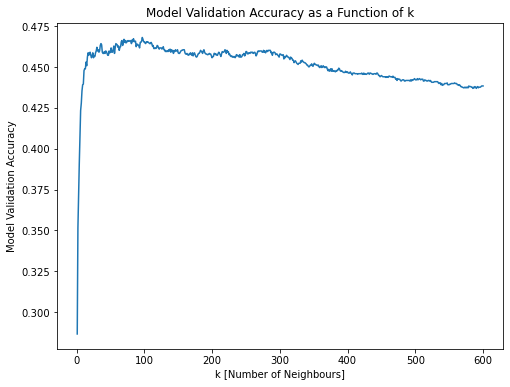

In [87]:
plt.figure(figsize=(8,6))
plt.plot(range(1,601),scores_knn_q2)
plt.xlabel('k [Number of Neighbours]')
plt.ylabel('Model Validation Accuracy')
plt.title('Model Validation Accuracy as a Function of k')

I will now investigate the accuracy, precision and recall scores of my final education category-predicting final k-Nearest Neighbours model; however, due to the sheer number of education categories I will not be compiling the confusion matrix. My final model will use the nearest 97 neighbours to make its classification, as that is the k which optimized model validation accuracy. 

In [88]:
# build the "final" k-Nearest Neighbours model for k=97 (which resulted in the highest model accuracy above)
knn_classifier = KNeighborsClassifier(n_neighbors = scores_knn_q2.index(max(scores_knn_q2))+1)
knn_classifier.fit(scaled_feat_train_q2, labels_train_q2)

# "ask" the model to classify the data in the validation data subset:
knn_labels_predictions_q2 = knn_classifier.predict(scaled_feat_test_q2)

# convert the labels Series to a NumPy array in order to pass to later model evaluation functions:
labels_test_q2_array = np.array(labels_test_q2.tolist())

# since there are more than two "education" categories, make a list of them to pass to the precision and recall score
# calculators:
ed_labels = ['graduated from college/university', 'graduated from masters program', 'working on college/university', \
          'working on masters program', 'graduated from two-year college', 'graduated from high school', \
          'graduated from ph.d program', 'graduated from law school', 'working on two-year college', 'med school', \
          'dropped out of college/university', 'working on ph.d program', 'college/university', 'ph.d program', \
          'graduated from space camp', 'dropped out of space camp', 'graduated from med school', 'law school', \
          'working on space camp', 'working on law school', 'two-year college', 'working on med school', \
          'dropped out of two-year college', 'dropped out of masters program', 'masters program', 'space camp', \
          'dropped out of ph.d program', 'dropped out of high school', 'high school', 'working on high school', \
          'dropped out of law school', 'dropped out of med school']


# calculate the model's accuracy score:
knn_classifier_score_q2 = knn_classifier.score(scaled_feat_test_q2, labels_test_q2)

# calculate the model's recall score. 
# As per https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html, this will be done by
# determining the metric for each label and finding their weighted average using the "weighted" keyword for the 
# average parameter. Since there are a few categories which don't appear in the validation data, set their values
# to 0 when calculating the metric.
knn_recall_score_q2 = recall_score(labels_test_q2_array, knn_labels_predictions_q2, \
                                   labels = ed_labels, average = 'weighted', zero_division = 0)
# calculate the model's precision score. 
# As per https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html, this will be done by
# determining the metric for each label and finding their weighted average using the "weighted" keyword for the 
# average parameter. Since there are a few categories which don't appear in the validation data, set their values
# to 0 when calculating the metric.
knn_precision_score_q2 = precision_score(labels_test_q2_array, knn_labels_predictions_q2, \
                                         labels = ed_labels, average = 'weighted', zero_division = 0)

# print out the results of the above evaluations:
print('Accuracy score: ' + str(np.round(knn_classifier_score_q2,3)))
print('Recall score: ' + str(np.round(knn_recall_score_q2,3)))
print('Precision score: ' + str(np.round(knn_precision_score_q2,3)))

Accuracy score: 0.455
Recall score: 0.455
Precision score: 0.319


The model's recall is precisely the same as its accuracy, which is unsurprising given how the recall is being calculated by recall_score(). (Using average = 'micro' resulted in an identical result.) I note that the model's precision is dismal--only 31.9%-- so it is clearly misclassifying the educations of the majority of OK Cupid users. <br>
In conclusion, while the k-Nearest Neighbours classification model that I "built" to predict education outperforms random guessing, it is not a very precise model, and it gets its predictions wrong over half the time. My model is better than guessing at random, but not too much better, so overall I don't consider this model to be a success.

<h3> 11. Conclusions </h3>

This project aimed to answer the following three questions:
<ol>
    <li> Can one predict whether an OK Cupid user's sex is male or female based on what they write in their profile essays? </li>
    <li> Can one predict whether an OK Cupid user's sex is male or female based on their self-reported age, drinking habits, drug-use habits, smoking habits, profile essays' lengths, the average lengths of words in their profile essays, and height in inches?  </li>
    <li> Can one predict an OK Cupid user's education level based on their self-reported age, sex, drinking habits, drug-use habits, smoking habits, profile essays' lengths, and the average lengths of words in their profile essays? </li>
</ol>

Upon conducting exploratory data analysis, it was found that age, self-reporting drinking habits, self-reported drug use habits, self-reported smoking habits, and height were all associated with sex. The association of height with sex was found to be the "strongest," as the male and female height histograms were quite clearly separated. Later, after pre-processing of essay text data, it was found that the lengths of essays 0, 1, 4, 5, 6, and 7 were all associated with sex, and that the average lengths of words in essays 1, 4, 6, and 7 were associated with sex. <br>
It was found that, when considering the written content of essays 0, 1, 2, 3, 4, 5, 6, and 7, a Multinomial Naïve Bayes classification model which predicts sex based on written essay content was 76% accurate and misclassified 27% of true males and 19% of true females in the validation set. <br>
It was found that a k-Nearest Neighbours classification model which bases its predictions of sex on age, height, and self-reported drinking, drug use, and smoking categorical data was 80% accurate and misclassified 12% of true males and 29% of true females. Meanwhile, a logistic regression classification model which bases its predictions on age, height, self-reported drinking, drug use, and smoking categorical data, the lengths of essays 0, 1, 4, 5, 6, and 7, and the average lengths of words in essays 1, 4, 6, and 7 was 82% accurate and misclassified 12% of true males and 26% of true females, and a SVM classification model which bases its predictions on the precise same features was 82% accurate and misclassified 18% of true males and 18% of true females. In terms of computational speed, the logistic regression and SVM classifiers were much faster than the k-Nearest Neighbours classifier. Both also outperform the k-Nearest Neighbours classifier on almost all metrics considered and thus are deemed to be superior models. If better precision is desired, the logistic regression model should be used to predict sex based on the previously listed input features; however, if better recall is desired, the SVM model should be used. <br>
Lastly, it was found that a k-Nearest Neighbours model which bases its predictions of education on age, sex, self-reported drinking, drug-use, and smoking categorical data, the lengths of essays 1, 4, 5, and 6, and the average lengths of words in essays 1, 4, 5, and 6 was 46% accurate, which did outperform random guessing.

<h3> 12. Cautions and Caveats </h3>

The conclusions reached above are certainly subject to cautions and caveats. <br>
As regards the first question, the written contents of essays 0, 1, 2, 3, 4, 5, 6, and 7 formed the basis of the Multinomial Naïve Bayes classification model ultimately built to predict sex. By no means was every conceivable combination of essay contents tested, so there may be more accurate and/or precise Multinomial Naïve Bayes classifiers which could be constructed using the data at hand. Further, it is possible that the model which <i>was</i> constructed is biased, as noise removal was performed on the data and the choice to remove HTML links and punctuation from the essays could have affected the classifier's training. While outside the scope of the current project, it would be interesting to compare the results of the model I built to one built with the same essay content information but no (or little) text pre-processing performed on the essay data. <br>
As regards the second question, the above caution about text pre-processing is very much applicable to it; the noise removal I chose to perform on the data could have biased the classification algorithms. To compound this, I made a few judgement calls when finding the lengths of essays and the average lengths of words in essays which could have introduced further bias, although I should point out that the number of judgement calls I ultimately made is very small compared to the number of OK Cupid users in the dataset. The specific essays I chose to evaluate for length and average word length may not have been the optimal ones for attempting to predict sex based on essay length and average word length; I did not, for example, include essays 2, 3, 8, or 9 in my model, nor did I find the lengths or average words lengths of these essays, and it is quite possible that one or all of them could be associated with sex. Further, as with the Multinomial Naïve Bayes classification model, I did not try every conceivable combination of input features to see which one resulted in the best model. Also, while I considered three of the most common supervised machine learning algorithms to use to build a sex-classification model, I did not try every supervised machine learning classification algorithm to see which one resulted in the best model, so it is quite possible that a different algorithm could yield more accurate and/or precise predictions. <br>
The same cautions which applied to the second question apply to the third one, perhaps even moreso in this case as fewer essays were considered (1, 4, 5, and 6). <br>
Lastly, I should note that there were many nominal categorical variables that I chose not to do anything with. Largely, this was because of the sheer number of categories a variable contained, but also because it wasn't clear to me if it was "fair" to treat the data as entirely user input or not. I suspect that in many cases, features like "religion" and "diet" resulted from users interacting with a dropdown menu that had an "other" category which allowed for custom user input, but I can by no means prove this. <br>
Codecademy usually prods learners to think of ways the data processing could have been improved, and I feel I did a good job of addressing that above. They also usually prod learners to think about ways the data/data collection could have been better, and I feel that I addressed that in the introduction. To summarize what I said there, little, if any, context was provided for the data, including what the precise questions were which prompted the user inputs I was provided with; the lone exception was a description of the 10 essays prompts, and I only got that because I had begun work on an earlier iteration of the project. Current Codecademy users won't even know what the essay prompts were unless they download the example solution code. For example, it would have been nice to know if users could input their highest education level, or if they were provided a drop-down menu for this. (I suspect that users were provided with a list of options, one of which was "other" and which allowed for custom input.) I suspect that, as a data scientist, I would have much more context about the data I was handed than Codecademy gave me, or at least a description of what precisely the columns were. Also, as I mentioned in the introduction, I have no idea exactly how these data were obtained and what precise selection criteria were used to construct the data set. The selection process could well have introduced bias into the results, but without knowing what those criteria were it is impossible to say for sure. At the very least, the data are biased because the users are all located in or around the San Francisco area; it is by no means obvious that a random selection of OK Cupid users from San Francisco are representative of OK Cupid users as a whole, let alone the U.S. population as a whole; and that's assuming that the data result from a random selection of OK Cupid users located in San Francisco, which is by no means guaranteed because I have no idea how the data were selected. <br>

<h3> Epilogue </h3>

While I personally found this a challenging project, I am glad I got the opportunity to complete it because it allowed me to gain skills in dealing with practical text data input by the average Internet user. As I mentioned in section 2, if you give a member of the general public a blank text box and the freedom to enter whatever they want in whatever format they want, they will in fact enter whatever they want in whatever format they want, whether or not that format is "friendly" to natural language processing. It was good to see the sheer variety of things users input and try to use the tools I learned to format their essays in such a way as to make them useful for machine learning algorithms. I do commend the curriculum developers at Codecademy for not "cleaning" the data to make it easier for us to analyze; I believe they provided us the essay data as they found/scraped/selected it. This is a much better model of what "real world" text data looks like than the heavily pre-processed text typical of basic natural language processing exercises, and it is good to get practice with it as I expect to be doing a fair amount of text processing as a data scientist.<br>
Also, it took me an embarrassingly long time to figure out the homophone-like pun the Codecademy curriculum developers used to name this project; I being the physicist that I am took the title literally and half expected the project to prod the Codecademy learner to develop a machine learning algorithm to pick out a few profiles they'd like to date. I eventually realized that some word play was afoot and would like to commend the Codecademy developers for naming their project a blatantly obvious pun that flew over my head for more weeks than I care to admit.